# Anomaly Detection Project

## Project Scenario 

Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

### Further Instructions 

- To turn in your project, email datascience@codeup.com with the subject line "Anomaly Detection Project"

- To get 100 on this project you only need to answer **5 out of the 7 questions** (along with the other deliverables listed below i.e. slide, your notebook, etc).

- Submit a link to a final notebook on GitHub that asks and answers questions - document the work you do to justify findings

- Compose an email with the answers to the questions/your findings, and in the email, include the link to your notebook in GitHub and attach your slide.

- You will not present this, so be sure that the details you need your leader to convey/understand are clearly communicated in the email.

- Your slide should be like an executive summary and be in form to present.

- Continue to use best practices of acquire.py, prepare.py, etc.

- Since there is no modeling to be done for this project, there is no need to split the data into train/validate/test

## Executive Summary 



### Project Goal 

In this project we address Questions 1, 2, 3, 5, 6, and 7. We are looking for anomalies in our data that interesting to the Codeup management.

### Outline 

We will take the following steps:

 - **Acquire** data from the Codeup database. 
     - We use a SQL query from our `acquire.py` file. 
 - **Prepare** the data by:
     - eliminating columns with excessive null values, 
     - imputing null values, 
     - creating a `Time` column that is a combination of the calendar and clock value. Set this column as the index. 
     - convert the remaining time columns to datetime format. 
 - **Explore** the data by creating visualizations for:
      - Visits to each path by program and
      - Visits to each path by cohort.
 - **Answer** questions 1, 2, 3, 5, 6, and 7. 
 
### Key Findings 

#### Question 1

For Program 1, the most frequently accessed page is not a lesson, but rather an index. Therefore, the most frequently accessed lesson is the second value `javascript-i`.

For Program 2, the most frequently accessed page is toc, which is likely Table of Contents. Thus, the most frequently accessed lesson for this program is also `javascript-i`.

For Program 3, the most frequently accessed page is `Classification Overview`, which is in fact a lesson.

#### Question 2
**Program 1**
- Cohort 6 was more likely to visit `javascript-ii/es6` than other cohorts. 

- Cohort 2 was more likely to visit some of the php lessons that the other cohorts. 

**Program 2**
- Cohort 139 is far more likely than the other cohorts in Program 2 to access many of the lessons, specifically Javascript lessons.

**Program 3**
- Students in Cohort 137, the Florence cohort, are more likely to access many of the lessons online than other cohorts in Program 3, including fundamentals, python, classification, etcetera.

- Cohorts 59 and 133, the Darden and Easley cohorts, were more likely to access the online lessons for classification than other cohorts.

#### Question 3
We can indentify 15 students that accessed the curriculum less than 20 times while they were active students. 

#### Questions 5
Students appear to have lost access to the other version of the curriculum in late October to early November 2019. 

#### Question 6
The most popular lessons for students after graduation were:
- javascript-i,
- java-iii,
- java-ii,
- jquery,
- mysql
- java-i,
- javascript-ii

#### Question 7 
There are 407 paths that only received 1 visit.


### Recommendations

It may be useful to elimate some of the paths that students are hardly visitng. Furthermore, more recent paths seem to be more popular, so regularly updating or rewriting the curriculum may increase student engagement. 

## Import Libraries

In [1]:
#Pandas
import pandas as pd

#Numpy
import numpy as np 

#Visualization imports
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as DateFormatter
import datetime
import seaborn as sns

#Import acquire and prepare
from acquire import get_cohort_data
from prepare import prepare_data

#Disable warnings 
import warnings
warnings.filterwarnings('ignore')

#Stats
from scipy import stats

## Acquire

We start by obtaining the data using the function from acquire which we imported above.

In [2]:
df = get_cohort_data()

In [3]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


In [69]:
df.tail()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2021-04-21 16:41:51,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0
2021-04-21 16:42:02,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0
2021-04-21 16:42:09,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0
2021-04-21 16:44:37,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0
2021-04-21 16:44:39,2021-04-21,16:44:39,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0


In [4]:
df.describe()

,user_id,cohort_id,id,program_id
count,900223.000000,847330.000000,847330.000000,847330.000000
mean,458.825707,48.501049,48.501049,2.086004
std,249.296767,32.795482,32.795482,0.388231
min,1.000000,1.000000,1.000000,1.000000
25%,269.000000,28.000000,28.000000,2.000000
50%,475.000000,33.000000,33.000000,2.000000
75%,660.000000,57.000000,57.000000,2.000000
max,981.000000,139.000000,139.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 103.0+ MB


**Note**

Our dataset has four values for `program_id`. The corresponding programs for each `program_id` are:
   - 1.0 == PHP Full Stack Web Development, 
   - 2.0 == Java Full Stack Web Development, 
   - 3.0 == Data Science, and 
   - 4.0 == Front End Web Development. 

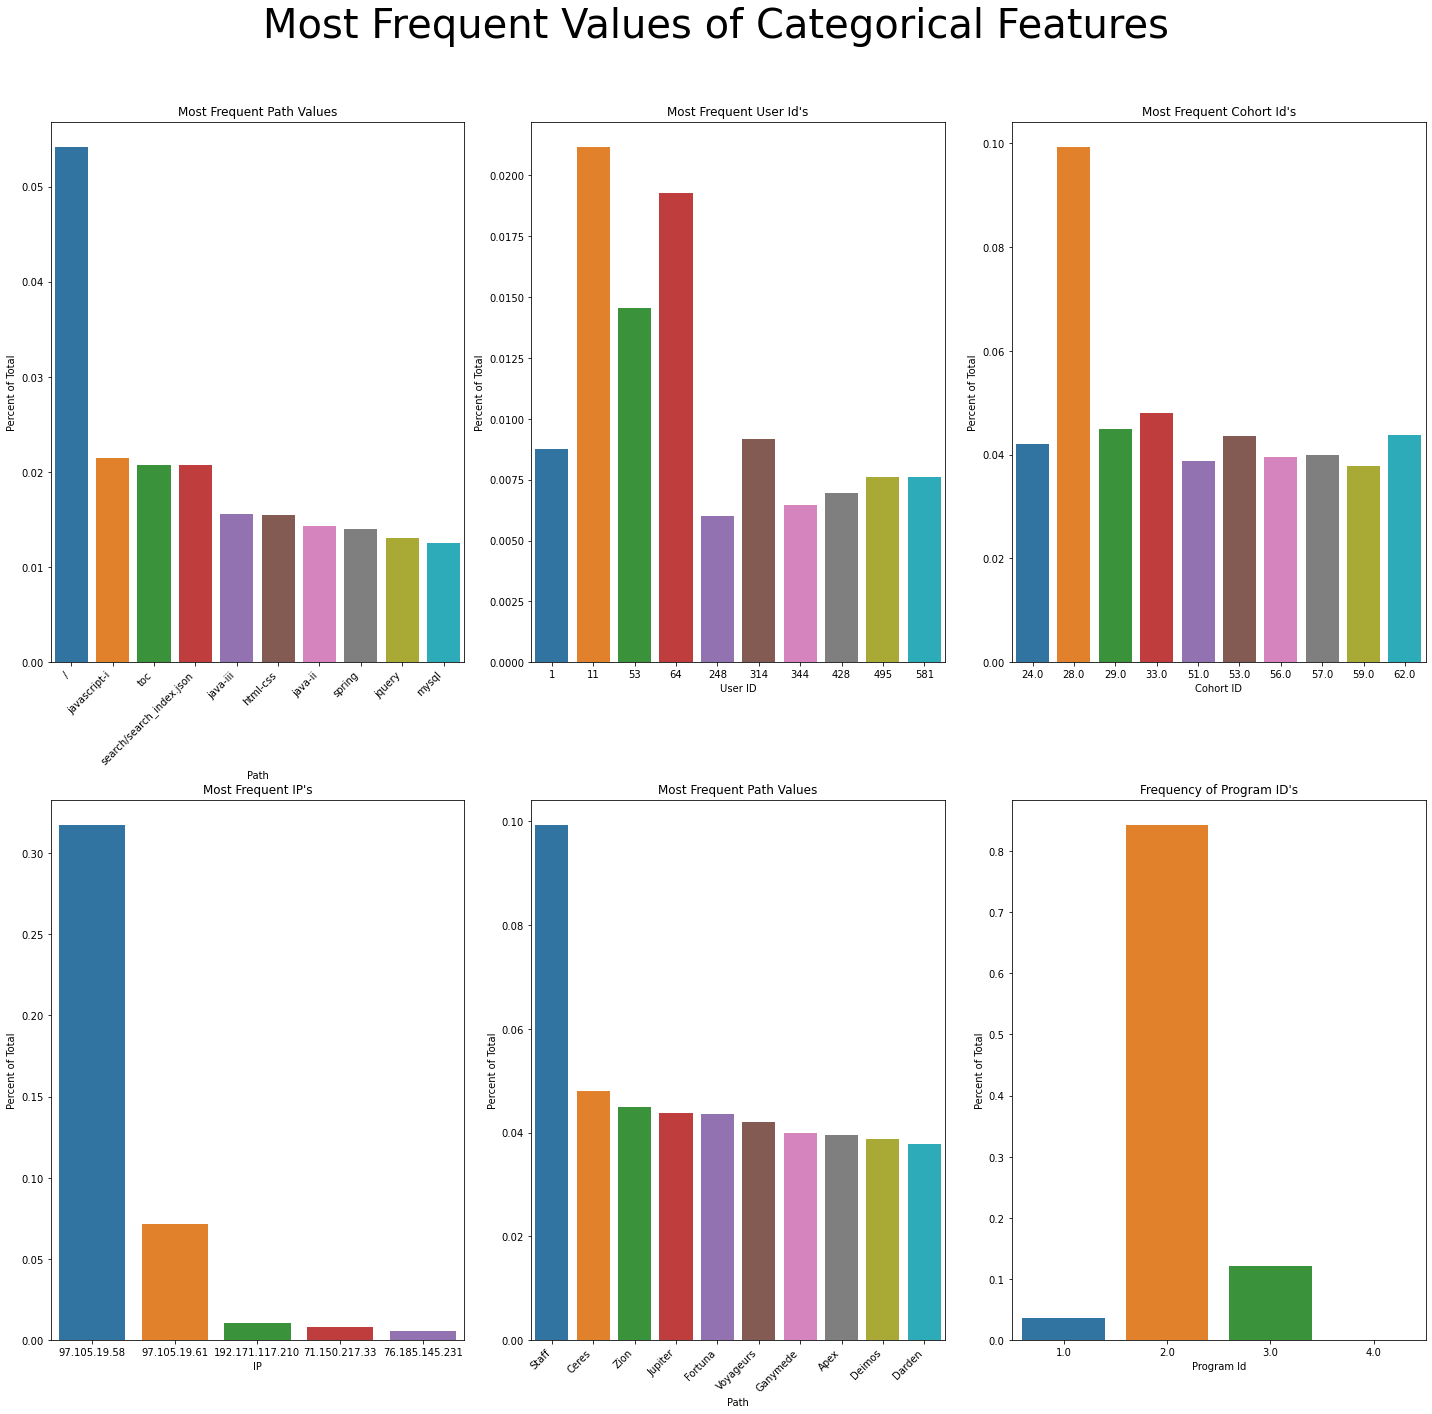

In [57]:
fig, axs = plt.subplots(ncols=3, nrows = 2, figsize = (20, 20))
fig.suptitle('Most Frequent Values of Categorical Features', fontsize = 40)
#Path
path_plots = sns.barplot(x='index', y='path', data=df['path'].value_counts(normalize=True).reset_index().sort_values(
        by='path', ascending=False).head(10), ax=axs[0, 0])
path_plots.set(title = "Most Frequent Path Values", xlabel = "Path", ylabel = "Percent of Total")
ticks = plt.setp(path_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')
#User ID
sns.barplot(x='index', y='user_id', data=df['user_id'].value_counts(normalize=True).reset_index().sort_values(
        by='user_id', ascending=False).head(10), ax=axs[0, 1]).set(Title = "Most Frequent User Id's", xlabel = "User ID", ylabel = "Percent of Total")
#Cohort ID
sns.barplot(x='index', y='cohort_id', data=df['cohort_id'].value_counts(normalize=True).reset_index().sort_values(
        by='cohort_id', ascending=False).head(10), ax=axs[0, 2]).set(Title = "Most Frequent Cohort Id's", xlabel = "Cohort ID", ylabel = "Percent of Total")
#IP Address
sns.barplot(x='index', y='ip', data=df['ip'].value_counts(normalize=True).reset_index().sort_values(
        by='ip', ascending=False).head(5), ax=axs[1, 0]).set(Title = "Most Frequent IP's", xlabel = "IP", ylabel = "Percent of Total")
#Cohort Names
cohort_names = sns.barplot(x='index', y='name', data=df['name'].value_counts(normalize=True).reset_index().sort_values(
        by='name', ascending=False).head(10), ax=axs[1, 1])
cohort_names.set(title = "Most Frequent Path Values", xlabel = "Path", ylabel = "Percent of Total")
ticks = plt.setp(cohort_names.get_xticklabels(), rotation = 45, horizontalalignment='right')
#Program ID
sns.barplot(x='index', y='program_id', data=df['program_id'].value_counts(normalize=True).reset_index().sort_values(
        by='program_id', ascending=False), ax=axs[1, 2]).set(Title = "Frequency of Program ID's", xlabel = "Program Id", ylabel = "Percent of Total")

fig.tight_layout()
fig.subplots_adjust(top=0.9)

Unsurprisingly, the most visited page is the homepage `/`. We can also see that the majority of requests are from the Staff, Cohort ID `28.0`. Because this program primarily concerns which sites the students are accessing, we should eliminate the data with a `cohort_id == 28.0`.


Now we will graph the date values in our DataFrame. 

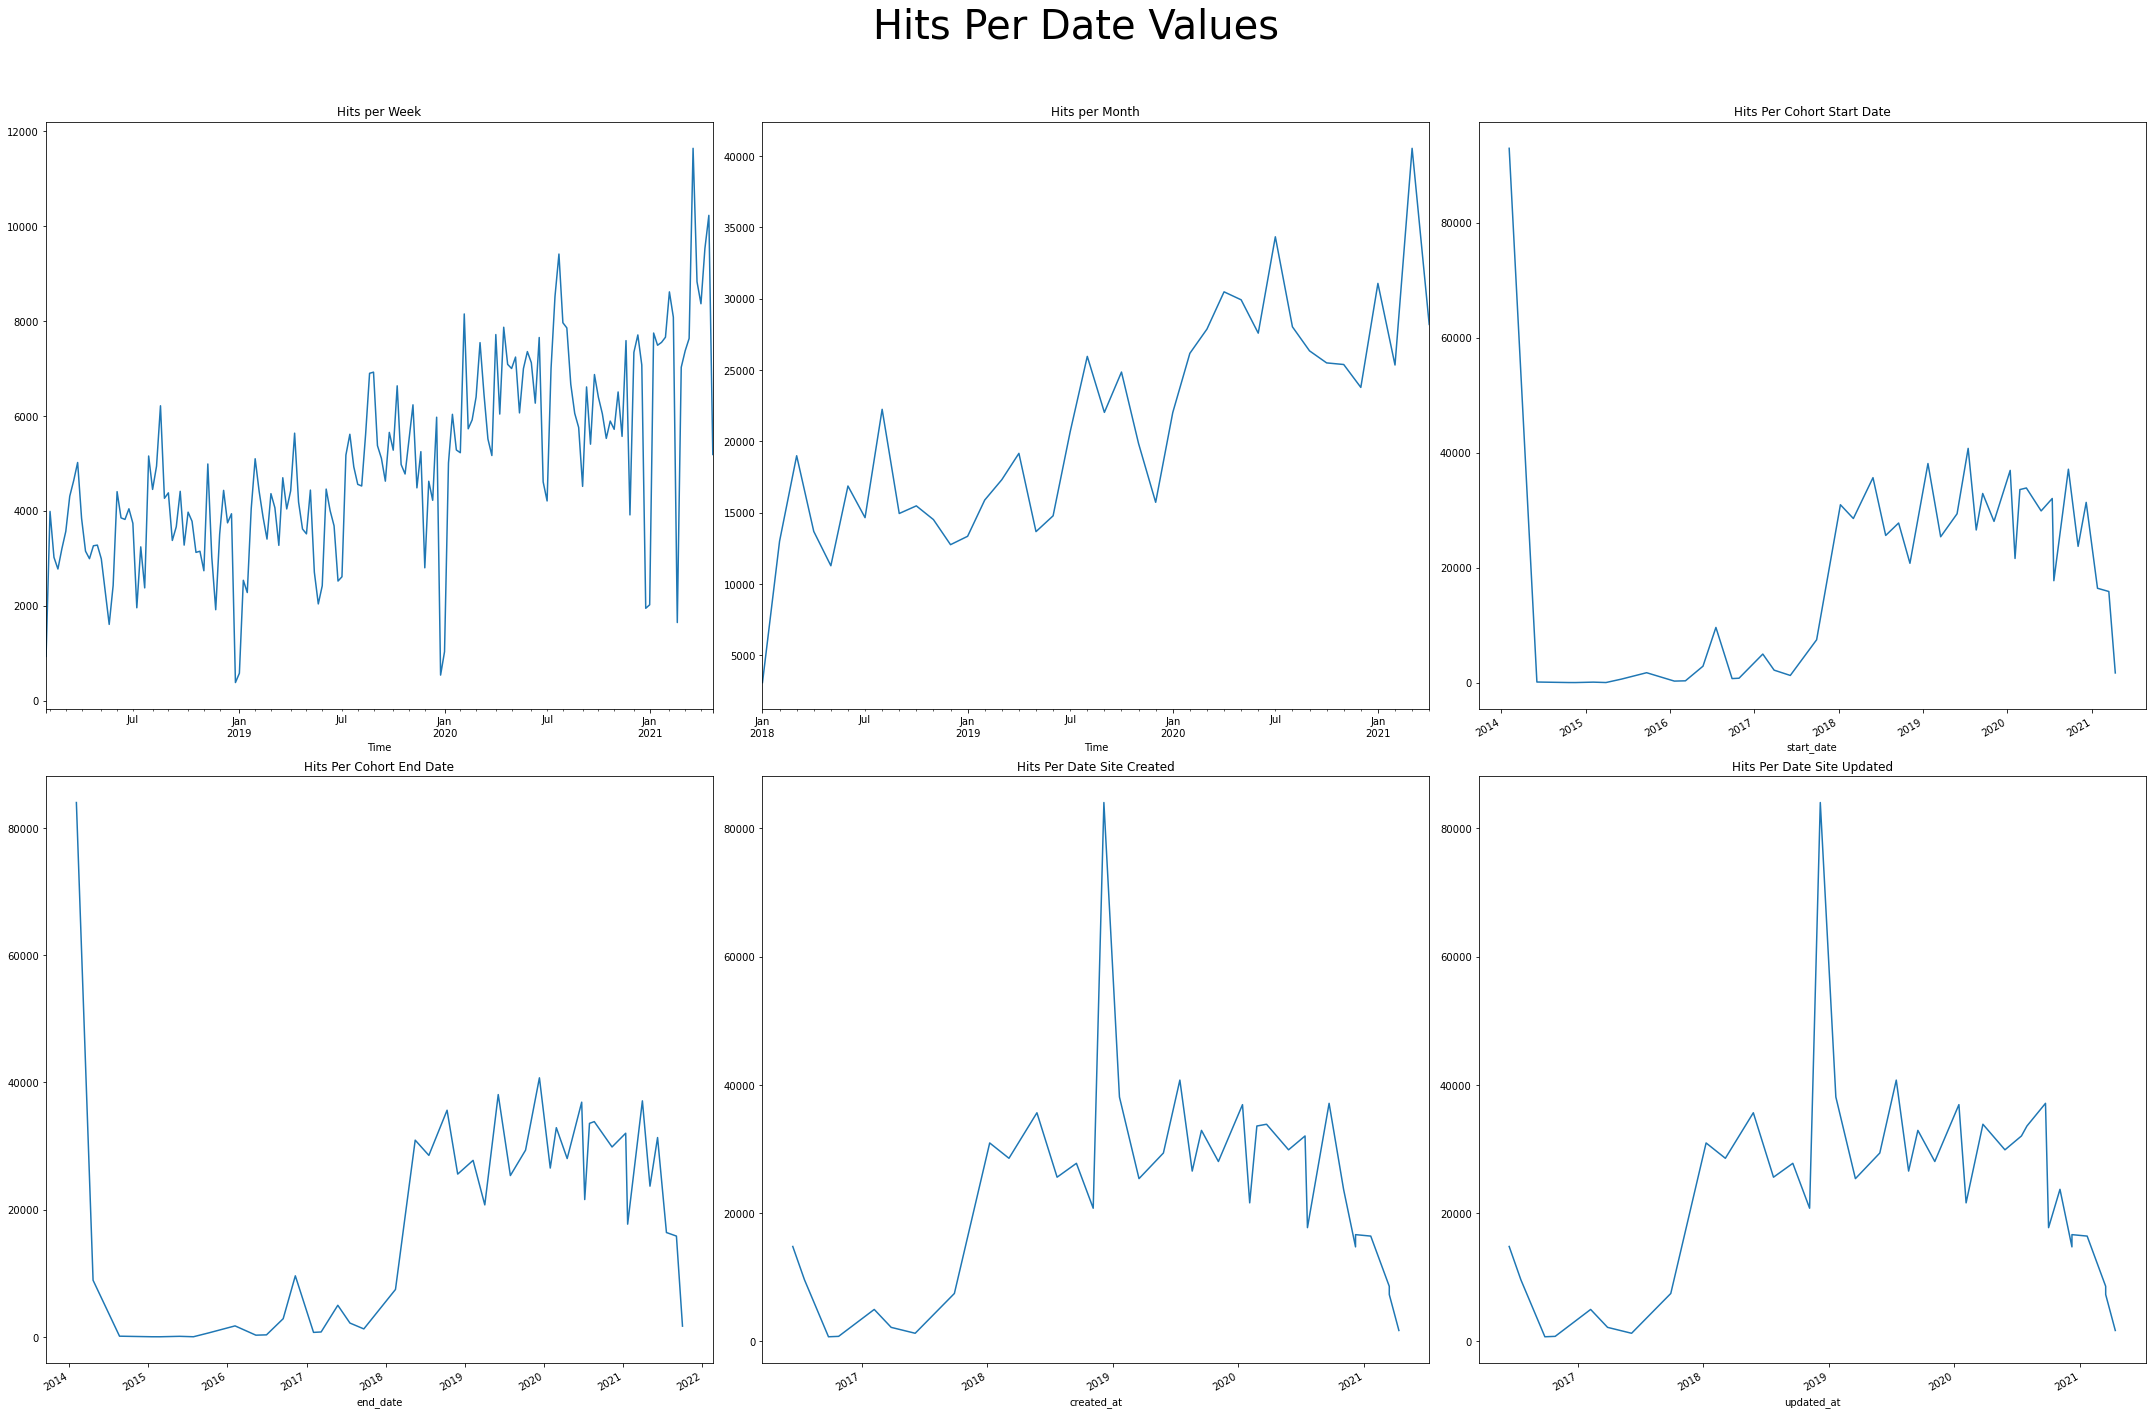

In [72]:
fig, axs = plt.subplots(ncols=3, nrows = 2, figsize = (30, 20))
fig.suptitle('Hits Per Date Values', fontsize = 40)

df.resample('W').ip.count().plot(ax=axs[0, 0]).set(Title = "Hits per Week")

df.resample('M').ip.count().plot(ax=axs[0, 1]).set(Title = 'Hits per Month')

df.groupby('start_date').ip.count().plot(ax=axs[0, 2]).set(Title = "Hits Per Cohort Start Date")

df.groupby('end_date').ip.count().plot(ax=axs[1, 0]).set(Title = "Hits Per Cohort End Date")

df.groupby('created_at').ip.count().plot(ax=axs[1, 1]).set(Title = "Hits Per Date Site Created")

df.groupby('updated_at').ip.count().plot(ax=axs[1, 2]).set(Title = "Hits Per Date Site Updated")

fig.tight_layout()
fig.subplots_adjust(top=0.9)


### Key Takeaways 

- We imported data using SQL query from our `acquire.py` file. 
- We graphed the distributions of the most frequent categorical features in our DataFrame. 
    - The homepage `\` is by far the most accessed site. 
    - The group with the most requests is the Staff. We will drop this group from our dataset to view just the students. 
- We visualized the date values of the sites accessed. 
    - The number of total hits is generally increasing with the time. There are some dips in the dataset, however, such as in winter, which is likely the result of the winter holidays.
    - There is a large amount of hits for students with a start date in the beginning of 2014, which falls significantly for students beginning in the later part of that year. In 2018, the access rate reaches stable levels. 
    - There is a peak in sites created in 2019. This may be when the most of the curriculum was written.

## Prepare

We now use our `prepare_data` function from our `prepare.py` file. Please see the prepare file in this repository for more information on this function. 

**Note**

As we stated in the **Acquire** section, we will drop Staff data in the prepare function, so that we can analyze just data that relates to students. 

In [3]:
df = prepare_data(df)

In [5]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:41,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 694165 entries, 2018-01-26 09:56:02 to 2021-04-21 16:41:51
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        694165 non-null  object        
 1   time        694165 non-null  object        
 2   path        694164 non-null  object        
 3   user_id     694165 non-null  int64         
 4   cohort_id   694165 non-null  float64       
 5   ip          694165 non-null  object        
 6   id          694165 non-null  float64       
 7   name        694165 non-null  object        
 8   slack       694165 non-null  object        
 9   start_date  694165 non-null  datetime64[ns]
 10  end_date    694165 non-null  datetime64[ns]
 11  created_at  694165 non-null  datetime64[ns]
 12  updated_at  694165 non-null  datetime64[ns]
 13  program_id  694165 non-null  float64       
dtypes: datetime64[ns](4), float64(3), int64(1), object(6)
memory usage

We have dropped approximately 20,000 rows from our dataset.

In [53]:
df[df.program_id == 4.0]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-03-22 19:01:54,2018-03-22,19:01:54,content/html-css,152,9.0,207.68.209.17,9.0,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,4.0
2018-03-22 19:01:54,2018-03-22,19:01:54,content/html-css/gitbook/images/favicon.ico,152,9.0,207.68.209.17,9.0,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,4.0
2018-03-22 19:02:47,2018-03-22,19:02:47,content/html-css,152,9.0,207.68.209.17,9.0,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,4.0
2018-03-22 19:02:52,2018-03-22,19:02:52,content/html-css/introduction.html,152,9.0,207.68.209.17,9.0,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,4.0


**Note** 

There are only four data points for `program_id == 4.0`. This data is negligible and confuses our analyses. Therefore, we will drop these rows from out dataset.

In [4]:
df = df[df.program_id != 4]

### Key Takeaways

 - Using our imported `prepare_data` function, we: 
     - imputed null values in the dataset,
     - created a new column with the calendar and the clock time, then made this column our new index,
     - converted the remaining time columns to datetime format, 
     - eliminated staff data from the dataset, 
     - dropped website paths for sites with just images, and
     - drops the website path for the homepage. 
 - Additionally, because we only had four rows for `program_id == 4.0`, we dropped these four rows from our dataset.
     - The program `program_id == 4.0` is Front End Web Development. Therefore, Front End Web Development Students are no longer part of our dataset.
     

## Explore 

### Number of Hits by Program ID

In [59]:
counts_by_group = pd.DataFrame(df.groupby('program_id').path.value_counts())
counts_by_group = counts_by_group.reset_index('program_id')
counts_by_group = counts_by_group.rename(columns = {'path': 'counts'})
counts_by_group.head(10)

,program_id,counts
path,,
index.html,1.0,1011
javascript-i,1.0,736
html-css,1.0,542
spring,1.0,501
java-iii,1.0,479
java-ii,1.0,454
java-i,1.0,444
javascript-ii,1.0,429
appendix,1.0,409


In [60]:
program_1 = counts_by_group[counts_by_group.program_id == 1.0]
program_1.head(10)

,program_id,counts
path,,
index.html,1.0,1011
javascript-i,1.0,736
html-css,1.0,542
spring,1.0,501
java-iii,1.0,479
java-ii,1.0,454
java-i,1.0,444
javascript-ii,1.0,429
appendix,1.0,409


In [61]:
program_2 = counts_by_group[counts_by_group.program_id == 2.0]
program_2.head(10)

,program_id,counts
path,,
toc,2.0,16517
javascript-i,2.0,15640
java-iii,2.0,11290
html-css,2.0,11285
java-ii,2.0,10459
spring,2.0,9973
jquery,2.0,9776
mysql,2.0,9423
java-i,2.0,9161


In [62]:
program_3 = counts_by_group[counts_by_group.program_id == 3.0]
program_3.head(10)

,program_id,counts
path,,
classification/overview,3.0,1785
1-fundamentals/1.1-intro-to-data-science,3.0,1633
sql/mysql-overview,3.0,1424
fundamentals/intro-to-data-science,3.0,1413
6-regression/1-overview,3.0,1124
anomaly-detection/overview,3.0,804
10-anomaly-detection/1-overview,3.0,751
3-sql/1-mysql-overview,3.0,707
stats/compare-means,3.0,668


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

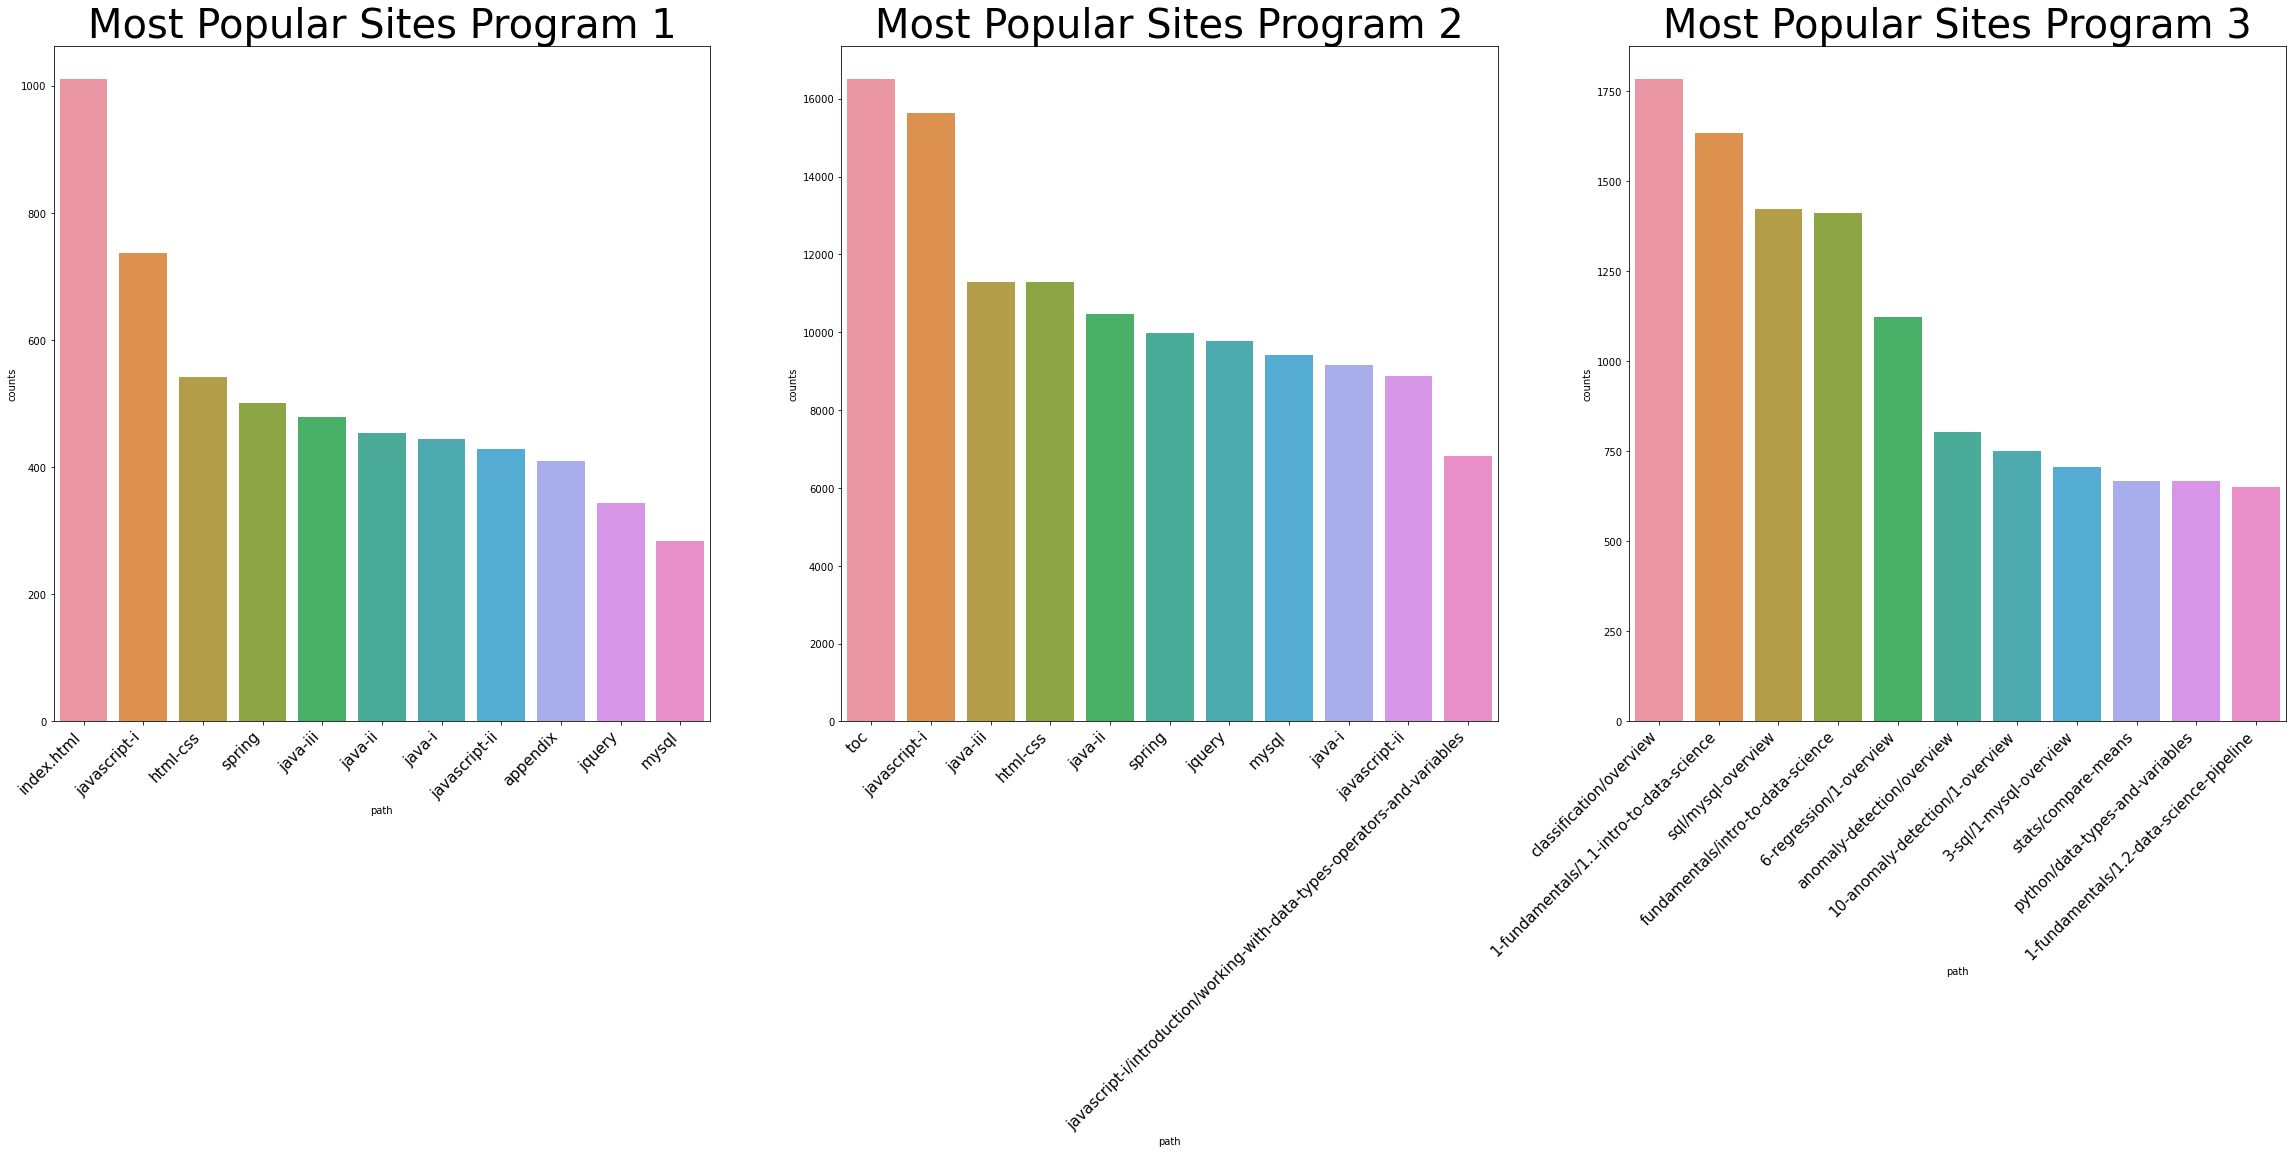

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (40, 5))

#Program 1 Top 10
program_1_most_popular = sns.barplot(x = program_1[0:11].index, y = program_1[0:11].counts, ax=ax1)
rticks = plt.setp(program_1_most_popular.get_xticklabels(), rotation = 45, horizontalalignment='right', fontsize = 15)
title = program_1_most_popular.set_title( "Most Popular Sites Program 1", fontsize = 40)

#Program 2 Top 10 
program_2_most_popular = sns.barplot(x = program_2[0:11].index, y = program_2[0:11].counts, ax=ax2)
rticks = plt.setp(program_2_most_popular.get_xticklabels(), rotation = 45, horizontalalignment='right', fontsize = 15)
title = program_2_most_popular.set_title( "Most Popular Sites Program 2", fontsize = 40)

#Program 3 Top 10 
program_3_most_popular = sns.barplot(x = program_3[0:11].index, y = program_3[0:11].counts, ax=ax3)
rticks = plt.setp(program_3_most_popular.get_xticklabels(), rotation = 45, horizontalalignment='right', fontsize = 15)
title = program_3_most_popular.set_title("Most Popular Sites Program 3", fontsize = 40)

fig.tight_layout()
fig.subplots_adjust(top=2.0)


### Key Takeaways

 - The most Java, Javascript, and Javaquery lessons are some of the most popular lessosn for **Program 1** and **Program 2**. The mysql lesson is also very popular for the programs. 
 - The classification overview is the most popular lesson for **Program 3** students. The fundamental lessons are also highly accessed for this course, in addition to SQL, Regression, anomaly detection, stats, and Python. 

### Number of Hits by Cohort

In [133]:
cohort_counts = pd.DataFrame(df.groupby('name').path.count())
cohort_counts = cohort_counts.sort_values(by = 'path', ascending = False)
top_10_cohort = cohort_counts.head(10)
top_10_cohort

,path
name,
Ceres,37679
Zion,35539
Jupiter,34415
Fortuna,33844
Voyageurs,33198
Ganymede,31022
Apex,30725
Deimos,30672
Teddy,28971


In [136]:
most_active_cohorts = top_10_cohort.index.to_list()

In [138]:
active_cohorts = df[df.name.isin(most_active_cohorts)]
active_cohorts.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:41,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:46,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:48,2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:59,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [169]:
active_cohorts.program_id.value_counts()

2.0    323885
Name: program_id, dtype: int64

In [146]:
popular_paths = pd.DataFrame(active_cohorts.groupby('name').path.value_counts())
popular_paths.head()

path
name path              
Apex toc            810
     html-css       738
     javascript-i   669
     java-ii        666
     java-iii       663

In [147]:
popular_paths.reset_index("name", inplace = True)


In [148]:
popular_paths.head()

,name,path
path,,
toc,Apex,810
html-css,Apex,738
javascript-i,Apex,669
java-ii,Apex,666
java-iii,Apex,663


In [150]:
popular_paths.rename(columns = {'path': 'counts'}, inplace = True)

In [154]:
popular_paths.head(10)

,name,counts
path,,
toc,Apex,810
html-css,Apex,738
javascript-i,Apex,669
java-ii,Apex,666
java-iii,Apex,663
spring,Apex,600
java-i,Apex,590
mysql,Apex,483
jquery,Apex,474


In [163]:
popular_paths = popular_paths.reset_index()

In [165]:
popular_paths.head()

,path,name,counts
0,toc,Apex,810
1,html-css,Apex,738
2,javascript-i,Apex,669
3,java-ii,Apex,666
4,java-iii,Apex,663


In [152]:
popular_paths.name.value_counts()

Teddy        534
Voyageurs    372
Zion         310
Ceres        295
Ganymede     294
Jupiter      286
Deimos       283
Apex         271
Hyperion     268
Fortuna      256
Name: name, dtype: int64

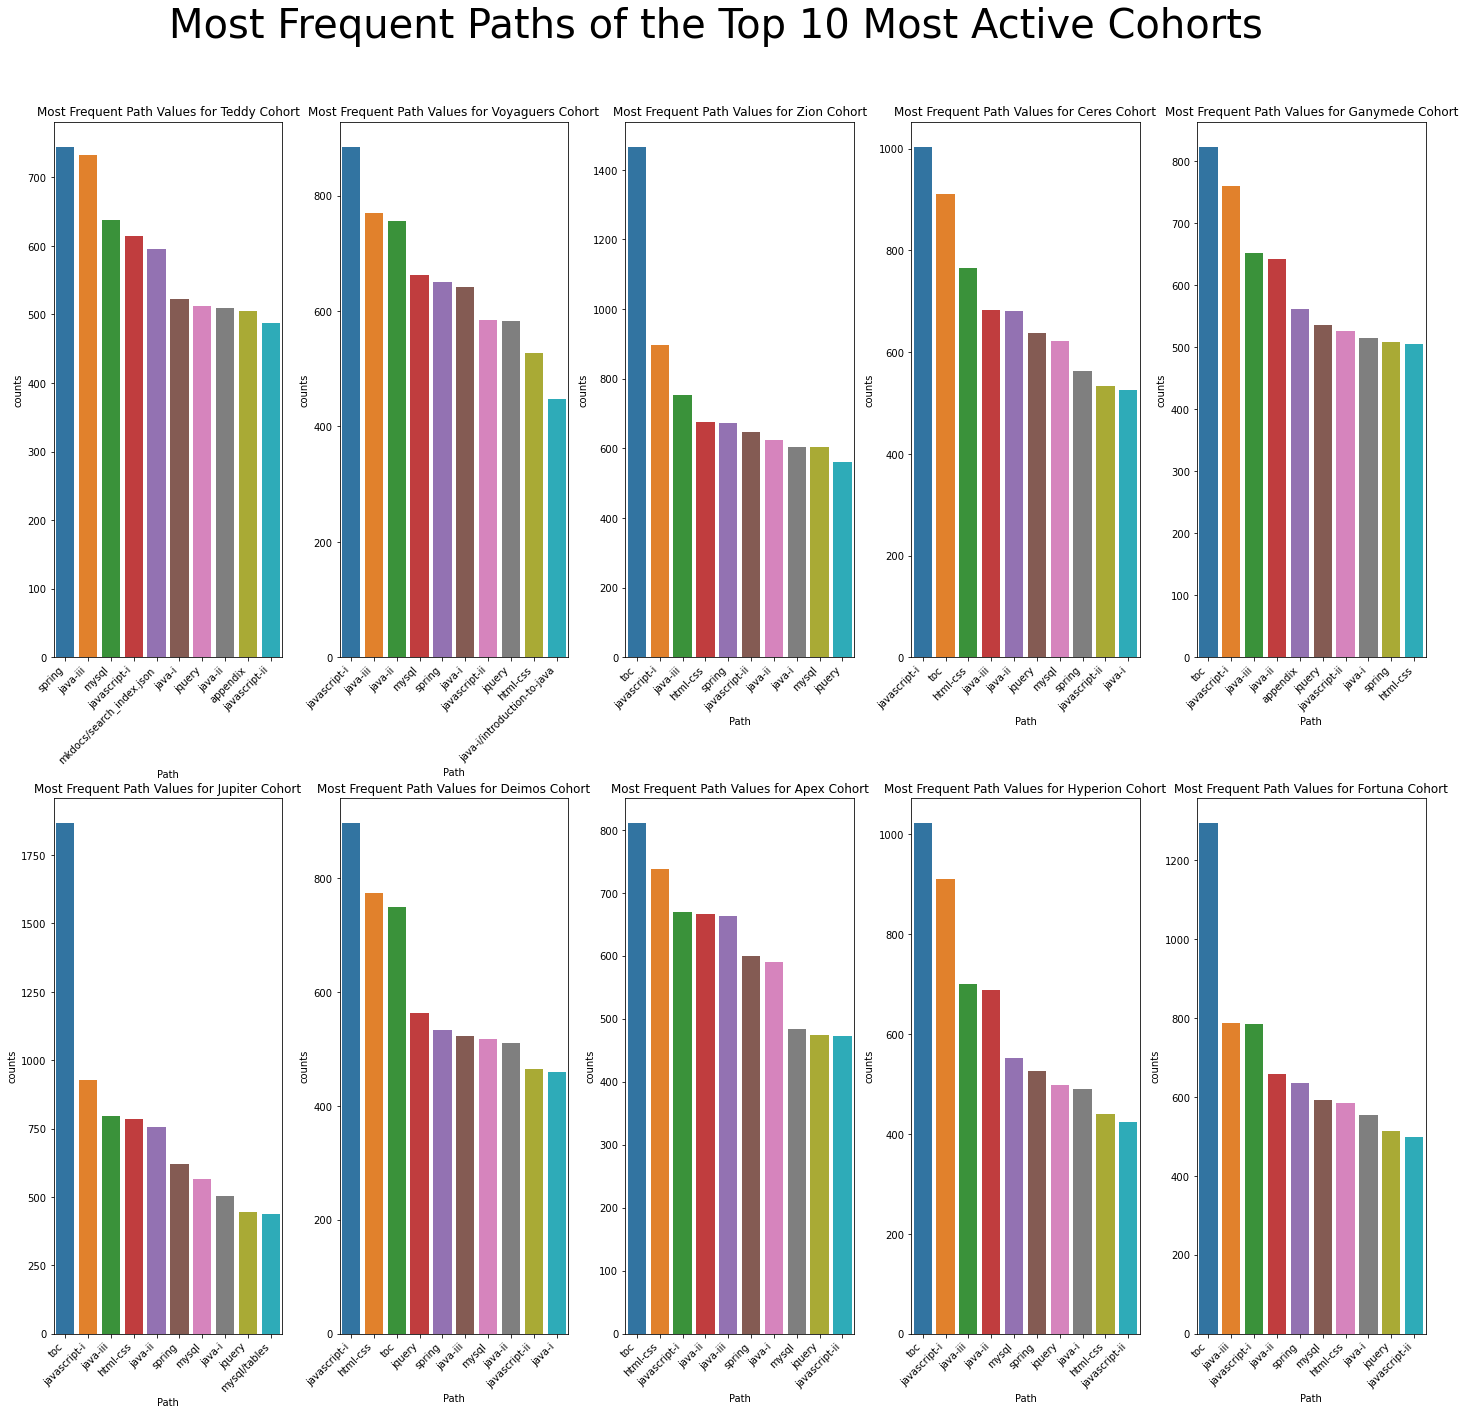

In [168]:
fig, axs = plt.subplots(ncols=5, nrows = 2, figsize = (20, 20))
fig.suptitle('Most Frequent Paths of the Top 10 Most Active Cohorts', fontsize = 40)

#Teddy
teddy_plots = sns.barplot(x = 'path', y='counts', data=popular_paths[popular_paths.name == 'Teddy'].head(10), ax = axs[0,0])
teddy_plots.set(title = "Most Frequent Path Values for Teddy Cohort", xlabel = "Path")
ticks = plt.setp(teddy_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')

#Voyageurs
voyageurs_plots = sns.barplot(x = 'path', y='counts', data=popular_paths[popular_paths.name == 'Voyageurs'].head(10), ax = axs[0,1])
voyageurs_plots.set(title = "Most Frequent Path Values for Voyaguers Cohort", xlabel = "Path")
ticks = plt.setp(voyageurs_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')

#Zion
zion_plots = sns.barplot(x = 'path', y='counts', data=popular_paths[popular_paths.name == 'Zion'].head(10), ax = axs[0,2])
zion_plots.set(title = "Most Frequent Path Values for Zion Cohort", xlabel = "Path")
ticks = plt.setp(zion_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')

#Ceres 
ceres_plots = sns.barplot(x = 'path', y='counts', data=popular_paths[popular_paths.name == 'Ceres'].head(10), ax = axs[0,3])
ceres_plots.set(title = "Most Frequent Path Values for Ceres Cohort", xlabel = "Path")
ticks = plt.setp(ceres_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')

#Ganymede 
ganymede_plots = sns.barplot(x = 'path', y='counts', data=popular_paths[popular_paths.name == 'Ganymede'].head(10), ax = axs[0,4])
ganymede_plots.set(title = "Most Frequent Path Values for Ganymede Cohort", xlabel = "Path")
ticks = plt.setp(ganymede_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')

#Jupiter 
jupiter_plots = sns.barplot(x = 'path', y='counts', data=popular_paths[popular_paths.name == 'Jupiter'].head(10), ax = axs[1,0])
jupiter_plots.set(title = "Most Frequent Path Values for Jupiter Cohort", xlabel = "Path")
ticks = plt.setp(jupiter_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')

#Deimos 
deimos_plots = sns.barplot(x = 'path', y='counts', data=popular_paths[popular_paths.name == 'Deimos'].head(10), ax = axs[1,1])
deimos_plots.set(title = "Most Frequent Path Values for Deimos Cohort", xlabel = "Path")
ticks = plt.setp(deimos_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')

#Apex 
apex_plots = sns.barplot(x = 'path', y='counts', data=popular_paths[popular_paths.name == 'Apex'].head(10), ax = axs[1,2])
apex_plots.set(title = "Most Frequent Path Values for Apex Cohort", xlabel = "Path")
ticks = plt.setp(apex_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')

#Hyperion
hyperion_plots = sns.barplot(x = 'path', y='counts', data=popular_paths[popular_paths.name == 'Hyperion'].head(10), ax = axs[1,3])
hyperion_plots.set(title = "Most Frequent Path Values for Hyperion Cohort", xlabel = "Path")
ticks = plt.setp(hyperion_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')


#Fortuna
fortuna_plots = sns.barplot(x = 'path', y='counts', data=popular_paths[popular_paths.name == 'Fortuna'].head(10), ax = axs[1,4])
fortuna_plots.set(title = "Most Frequent Path Values for Fortuna Cohort", xlabel = "Path")
ticks = plt.setp(fortuna_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')


fig.tight_layout()
fig.subplots_adjust(top=0.9)

### Key Takeaways 

 - As we saw earlier, the Java and SQL lessons are very popular for students in **Program 2**. 
 - The `toc` path is also very popular. 
 - Interestingly, the top 10 cohorts with the most active users are all in **Program 2**.

## Question 1

In this section, we will explore the data to answer the question:
   - Which lesson appears to attract the most traffic consistently across cohorts (per program)?

We can address this question in a number of different ways. One way we can address this question initially is by seeing what is the most frequently accessed page for each cohort.

In [181]:
cohort = df.groupby(['cohort_id'])['path'].agg(lambda x:x.value_counts().index[0])

In [182]:
cohort = pd.DataFrame(cohort)

In [183]:
cohort

,path
cohort_id,
1.0,javascript-i
2.0,content/php_ii/command-line
4.0,prework/versioning/github
6.0,javascript-ii/es6
7.0,content/html-css
8.0,java-iii
11.0,html-css
12.0,content/html-css
13.0,index.html


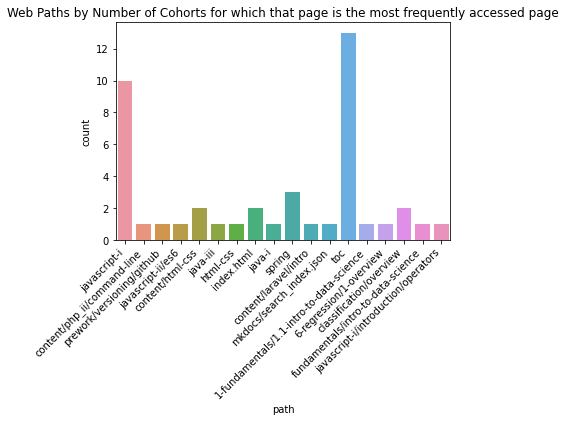

In [184]:
most_frequent_page = sns.countplot(cohort.path)
ticks = plt.setp(most_frequent_page.get_xticklabels(), rotation = 45, horizontalalignment='right')
title = most_frequent_page.set(Title = "Web Paths by Number of Cohorts for which that page is the most frequently accessed page")

### Key Takeaways

- The page is the most common "top hit" for each cohort is `toc`. A close second is `javascipt-i`. Other common responses include the other javascript lesson, java lessons, data science fundamentals, classification, and regression. 
- Interestingly SQL does not appear to be any cohorts most frequently accessed lesson.

We can also address this question by calculating the probability that a student accessed a particular path, given that students program_id. We can calculate this below:

In [187]:
path_given_program = (
    df.groupby(['program_id'])
    .path.value_counts(normalize=True)
    .rename('proba_status_program')
    .reset_index()
)

In [189]:
path_given_program.head()

,program_id,path,proba_status_program
0,1.0,index.html,0.035217
1,1.0,javascript-i,0.025637
2,1.0,html-css,0.018880
3,1.0,spring,0.017452
4,1.0,java-iii,0.016685


We can use these calculations to explore the most popular paths for each program.

First we will start will **Program 1**.

In [206]:
program_1 = path_given_program[path_given_program.program_id == 1.0]

In [207]:
program_1.head(20)

,program_id,path,proba_status_program
0,1.0,index.html,0.035217
1,1.0,javascript-i,0.025637
2,1.0,html-css,0.018880
3,1.0,spring,0.017452
4,1.0,java-iii,0.016685
5,1.0,java-ii,0.015814
6,1.0,java-i,0.015466
7,1.0,javascript-ii,0.014944
8,1.0,appendix,0.014247
9,1.0,jquery,0.011983


**Program 2**

In [208]:
program_2 = path_given_program[path_given_program.program_id == 2.0]
program_2.head(20)

,program_id,path,proba_status_program
696,2.0,toc,0.028194
697,2.0,javascript-i,0.026697
698,2.0,java-iii,0.019272
699,2.0,html-css,0.019263
700,2.0,java-ii,0.017853
701,2.0,spring,0.017023
702,2.0,jquery,0.016687
703,2.0,mysql,0.016085
704,2.0,java-i,0.015637
705,2.0,javascript-ii,0.015137


**Program 3**

In [209]:
program_3 = path_given_program[path_given_program.program_id == 3.0]
program_3.head(20)

,program_id,path,proba_status_program
1794,3.0,classification/overview,0.022421
1795,3.0,1-fundamentals/1.1-intro-to-data-science,0.020512
1796,3.0,sql/mysql-overview,0.017887
1797,3.0,fundamentals/intro-to-data-science,0.017748
1798,3.0,6-regression/1-overview,0.014118
1799,3.0,anomaly-detection/overview,0.010099
1800,3.0,10-anomaly-detection/1-overview,0.009433
1801,3.0,3-sql/1-mysql-overview,0.008880
1802,3.0,stats/compare-means,0.008391
1803,3.0,python/data-types-and-variables,0.008378


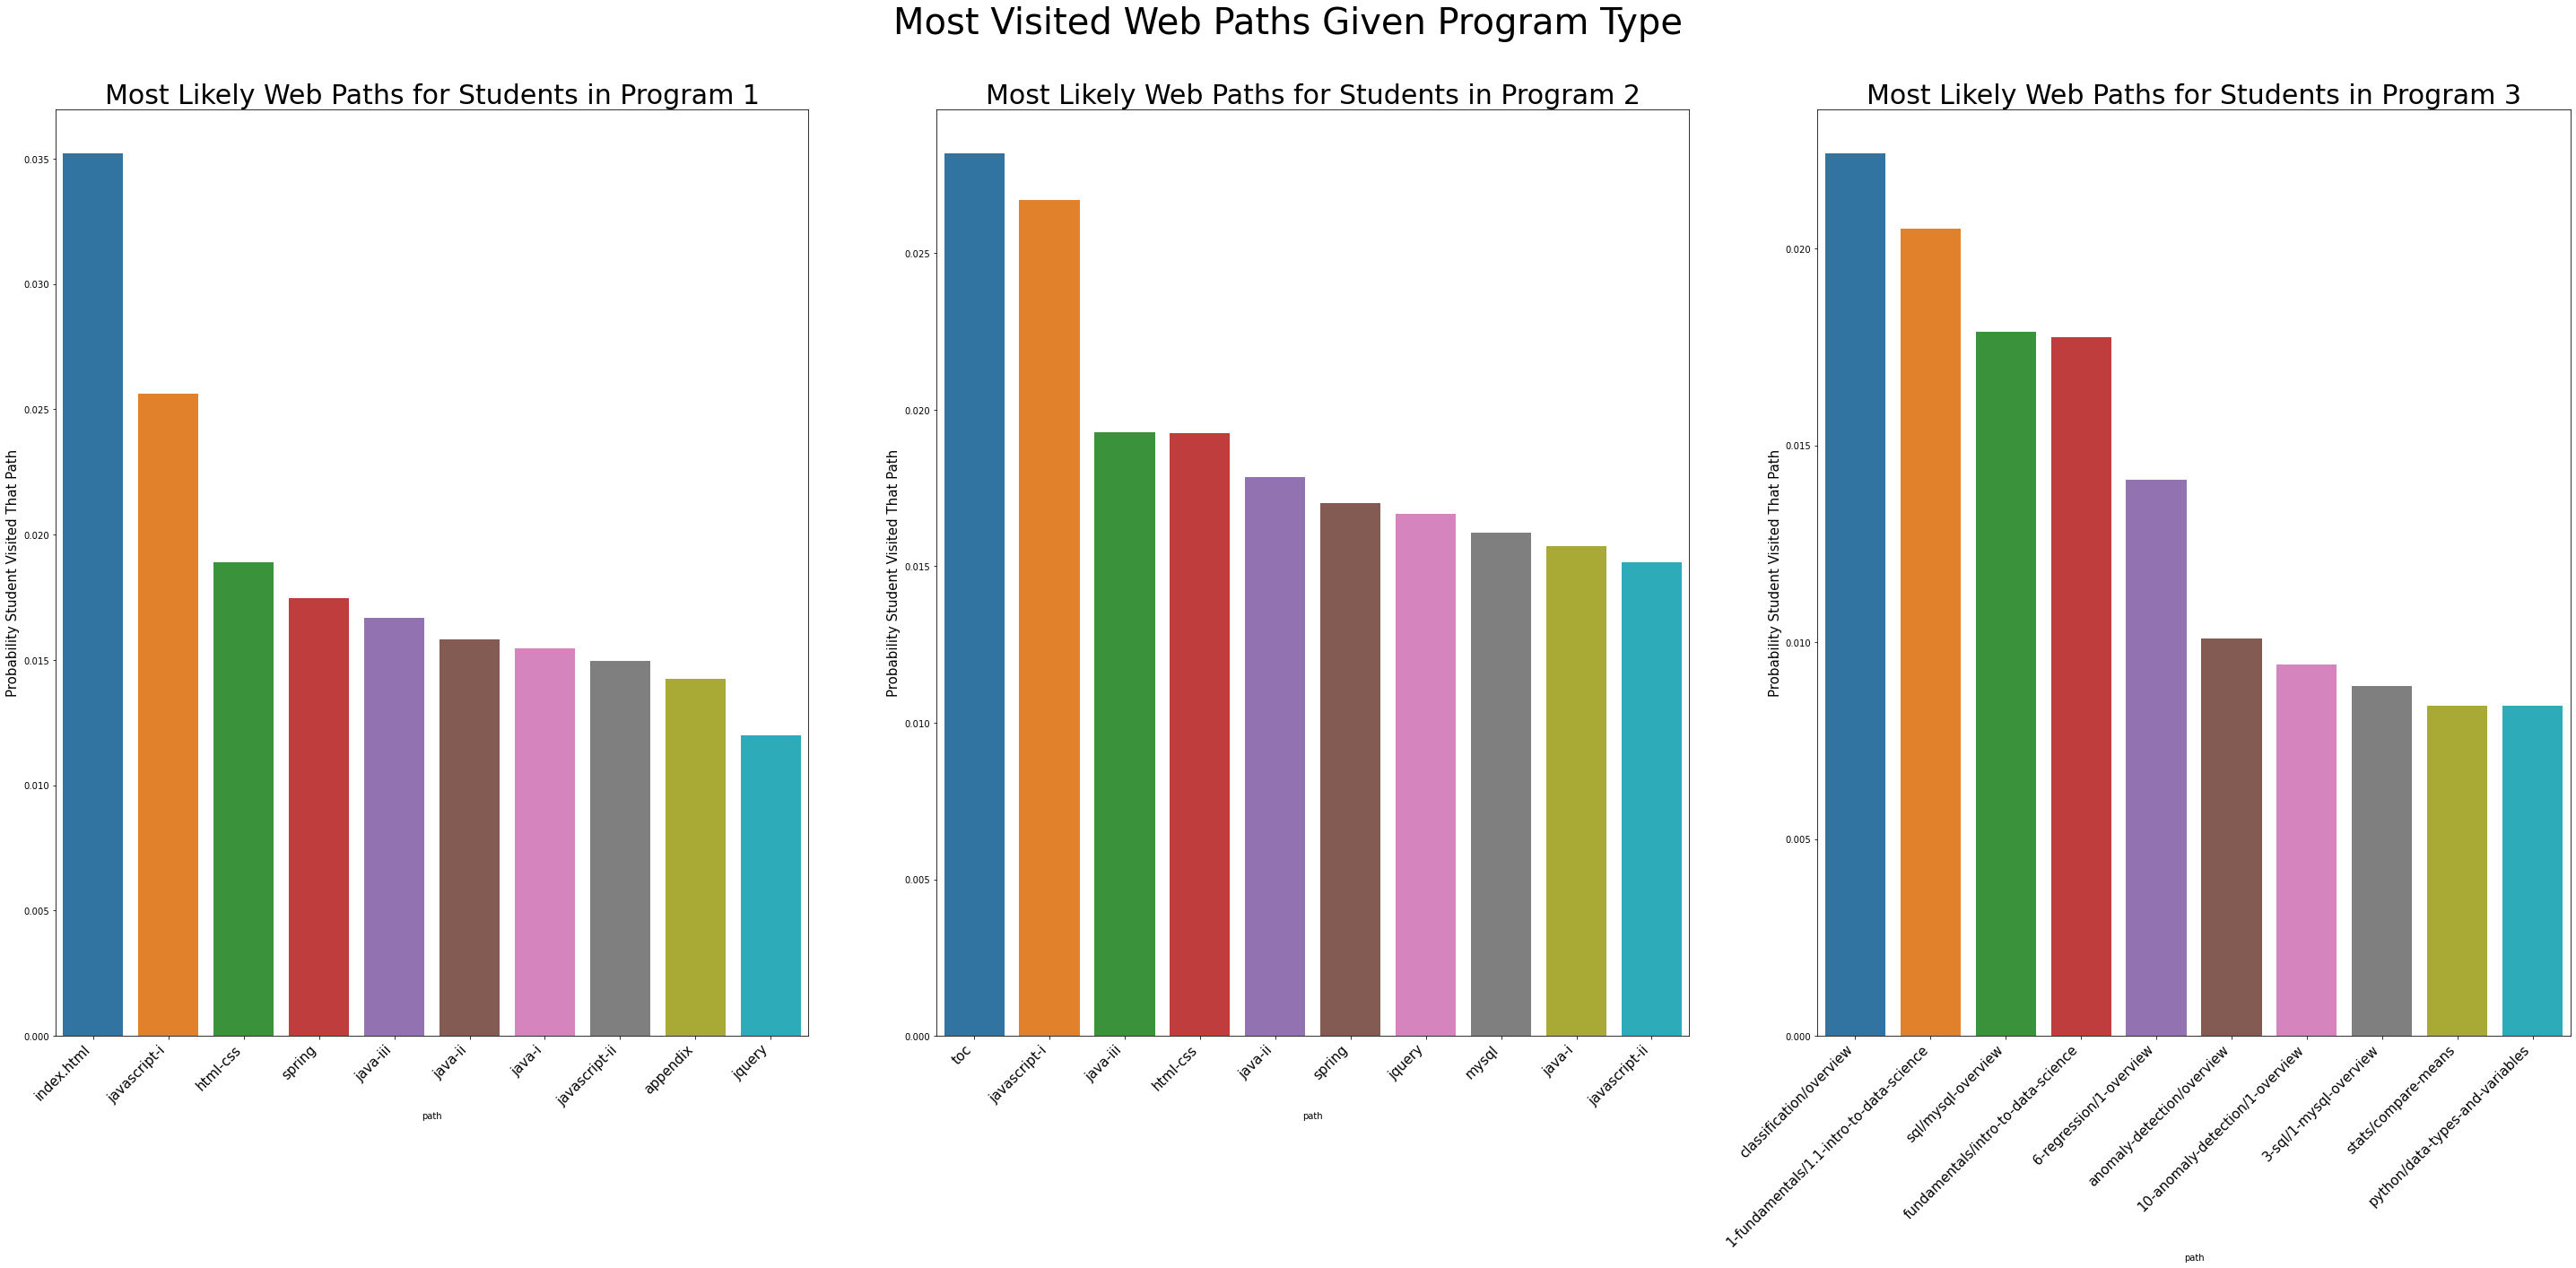

In [214]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (40, 20))
fig.suptitle('Most Visited Web Paths Given Program Type', fontsize = 40)

#Program 1
program_1_plot = sns.barplot(x='path', y='proba_status_program', data=program_1.head(10), ax=ax1)
program_1_plot.set_title("Most Likely Web Paths for Students in Program 1", fontsize = 30)
program_1_plot.set_ylabel("Probability Student Visited That Path", fontsize = 15)
rticks = plt.setp(program_1_plot.get_xticklabels(), rotation = 45, horizontalalignment='right', fontsize = 15)



#Program 2
program_2_plot = sns.barplot(x='path', y='proba_status_program', data=program_2.head(10), ax=ax2)
program_2_plot.set_title("Most Likely Web Paths for Students in Program 2", fontsize = 30)
program_2_plot.set_ylabel("Probability Student Visited That Path", fontsize = 15)
rticks = plt.setp(program_2_plot.get_xticklabels(), rotation = 45, horizontalalignment='right', fontsize = 15)



#Program 3
program_3_graph = sns.barplot(x='path', y='proba_status_program', data=program_3.head(10), ax=ax3)
ticks = plt.setp(program_3_graph.get_xticklabels(), rotation = 45, horizontalalignment='right', fontsize = 15)
program_3_graph.set_title( "Most Likely Web Paths for Students in Program 3", fontsize = 30)
program_3_graph.set_ylabel ("Probability Student Visited That Path", fontsize = 15)

fig.tight_layout()
fig.subplots_adjust(top=0.9)

### Conclusion 

To answer the question this question poses, we can simply refer to the graphs above. 

For **Program 1**, the most frequently accessed page is not a lesson, but rather an index. Therefore, the most frequently accessed lesson is the second value **javascript-i**. 

For **Program 2**, the most frequently accessed page is toc, which is likely Table of Contents. Thus, the most frequently accessed lesson for this program is also **javascript-i**.

For **Program 3**, the most frequently accessed page is **Classification Overview**, which is in fact a lesson. 

## Question 2

Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

**Note** 

Although our `cohort_id` values range from 0 to 137, there are only 41 unique `cohort_id` values. This is demonstrated by the following cells of code.

In [438]:
df.cohort_id.min()

1.0

In [439]:
df.cohort_id.max()

139.0

In [440]:
len(df.cohort_id.unique())

47

To answer the question posed above, we will group our data by `program_id` and `cohort_id`. 

We will then check if any of the cohorts are more likely to visit a certain page than the majority of users in their Program. 

In [215]:
path_given_program_and_cohort = (
    df.groupby(['program_id', 'cohort_id'])
    .path.value_counts(normalize=True)
    .rename('proba_path_program')
    .reset_index()
)

In [217]:
path_given_program_and_cohort.head()

,program_id,cohort_id,path,proba_path_program
0,1.0,1.0,javascript-i,0.035779
1,1.0,1.0,html-css,0.026165
2,1.0,1.0,javascript-ii,0.024827
3,1.0,1.0,spring,0.023366
4,1.0,1.0,java-ii,0.020324


Unsuprisingly, the most likely pages for `Program_1` are values we have seen before, such as Javascript pages. 

Now we will split the probabilities up by Program 1. We will compare each cohort's likelihood to visit a particular page to other cohorts in the same program.

In [218]:
#Program 1
program_1 = path_given_program_and_cohort[path_given_program_and_cohort.program_id == 1.0]
#Program 2
program_2 = path_given_program_and_cohort[path_given_program_and_cohort.program_id == 2.0]
#Program 3
program_3 = path_given_program_and_cohort[path_given_program_and_cohort.program_id == 3.0]
#Program 4
program_4 = path_given_program_and_cohort[path_given_program_and_cohort.program_id == 4.0]

### Program 1

In [219]:
program_1.head()

,program_id,cohort_id,path,proba_path_program
0,1.0,1.0,javascript-i,0.035779
1,1.0,1.0,html-css,0.026165
2,1.0,1.0,javascript-ii,0.024827
3,1.0,1.0,spring,0.023366
4,1.0,1.0,java-ii,0.020324


There are multiple strategies we can use to investigate whether or not certain cohorts visit certain pages more frequently than others. 

First, we will investigate the question of whether certain cohorts visit certain webpages more often by seeing how many times each webpage appears in each cohort's top 5 most visited page.

The following DataFrame will give us the top five most frequently visited pages for each cohort in Program 1.

In [224]:
top_five = program_1.groupby("cohort_id").head(5)
top_five.head(20)

,program_id,cohort_id,path,proba_path_program
0,1.0,1.0,javascript-i,0.035779
1,1.0,1.0,html-css,0.026165
2,1.0,1.0,javascript-ii,0.024827
3,1.0,1.0,spring,0.023366
4,1.0,1.0,java-ii,0.020324
339,1.0,2.0,content/php_ii/command-line,0.078947
340,1.0,2.0,content/php_i,0.065789
341,1.0,2.0,content/php_ii/command-line/io-streams.html,0.065789
342,1.0,2.0,content/php_ii/control-structures-i,0.065789
343,1.0,2.0,content/php_ii,0.052632


Now we'll count how many times each webpage appears in each cohort's top five.

In [226]:
times_in_top_5 = pd.DataFrame(top_five.path.value_counts())
times_in_top_5.head()

,path
html-css,5
content/html-css,4
java-ii,3
java-iii,3
javascript-i,3


We'll look at the values that only appear in one cohort's top five.

In [227]:
times_in_top_5[times_in_top_5.path == 1]

,path
java-iii/user-input,1
content/laravel/intro/gitbook/images/favicon.ico,1
content/html-css/elements.html,1
mkdocs/search_index.json,1
content/php_i,1
javascript-i/functions,1
content/php_iii,1
java-i/methods,1
content/php_ii/control-structures-i,1
prework/databases,1


We'll make these webpaths into a list.

In [228]:
webpaths = times_in_top_5[times_in_top_5.path == 1].index.to_list()
webpaths

['java-iii/user-input',
 'content/laravel/intro/gitbook/images/favicon.ico',
 'content/html-css/elements.html',
 'mkdocs/search_index.json',
 'content/php_i',
 'javascript-i/functions',
 'content/php_iii',
 'java-i/methods',
 'content/php_ii/control-structures-i',
 'prework/databases',
 'javascript-i/introduction/working-with-data-types-operators-and-variables',
 'appendix',
 'javascript-ii',
 'content/php_ii/command-line/io-streams.html',
 'html-css/introduction',
 'content/laravel/intro/environment.html',
 'content/php_ii/command-line',
 'content/javascript',
 'javascript-ii/es6',
 'prework/versioning/github',
 'jquery',
 'html-css/forms',
 'content/php_ii',
 'html-css/elements']

Then we'll create a DataFrame with just these webpaths.

In [230]:
only_in_top_5_once = program_1[program_1.path.isin(webpaths)]
only_in_top_5_once.head()

,program_id,cohort_id,path,proba_path_program
2,1.0,1.0,javascript-ii,0.024827
6,1.0,1.0,appendix,0.016186
7,1.0,1.0,jquery,0.016186
12,1.0,1.0,html-css/elements,0.010588
21,1.0,1.0,html-css/forms,0.009249


We'll find the max probability for each of these webpaths. These cohorts likely visit these webpaths more than other cohorts.

In [231]:
unusual_values = only_in_top_5_once[only_in_top_5_once.proba_path_program.isin(only_in_top_5_once.groupby('path')['proba_path_program'].max())]
unusual_values

,program_id,cohort_id,path,proba_path_program
339,1.0,2.0,content/php_ii/command-line,0.078947
340,1.0,2.0,content/php_i,0.065789
341,1.0,2.0,content/php_ii/command-line/io-streams.html,0.065789
342,1.0,2.0,content/php_ii/control-structures-i,0.065789
343,1.0,2.0,content/php_ii,0.052632
382,1.0,4.0,mkdocs/search_index.json,0.333333
383,1.0,4.0,prework/databases,0.333333
384,1.0,4.0,prework/versioning/github,0.333333
385,1.0,6.0,javascript-ii/es6,0.149254
389,1.0,6.0,java-iii/user-input,0.044776


### Takeaway

Users in the above cohorts are probably more likely to visit the corresponding web pages than other cohorts in the same program.

Another way to see if a cohort is viewing a webpage more than the usual is to compare that cohort's behavior to the average.

We'll calculate the average probabilities for viewing each webpage.

In [232]:
average_probability = program_1.groupby('path')['proba_path_program'].mean()
average_probability = pd.DataFrame(average_probability)
average_probability = average_probability.rename(columns = {"proba_path_program": "Average"})
average_probability.head()

,Average
path,
0_Classification_Algorithms,0.000397
1-fundamentals/1.1-intro-to-data-science,0.005068
1-fundamentals/2.4-more-excel-features,0.000932
1._Fundamentals,0.000424
10-anomaly-detection/1-overview,0.000106


Now we'll merge our two DataFrames.

In [233]:
program_1 = pd.merge(program_1, average_probability, on = "path")
program_1.head()

,program_id,cohort_id,path,proba_path_program,Average
0,1.0,1.0,javascript-i,0.035779,0.020124
1,1.0,2.0,javascript-i,0.013158,0.020124
2,1.0,6.0,javascript-i,0.029851,0.020124
3,1.0,7.0,javascript-i,0.020794,0.020124
4,1.0,8.0,javascript-i,0.024210,0.020124


Now let's look at the difference between the cohort's probability and the average probability.

In [234]:
program_1['difference'] = program_1['proba_path_program'] - program_1['Average']
program_1.head()

,program_id,cohort_id,path,proba_path_program,Average,difference
0,1.0,1.0,javascript-i,0.035779,0.020124,0.015655
1,1.0,2.0,javascript-i,0.013158,0.020124,-0.006966
2,1.0,6.0,javascript-i,0.029851,0.020124,0.009727
3,1.0,7.0,javascript-i,0.020794,0.020124,0.000670
4,1.0,8.0,javascript-i,0.024210,0.020124,0.004086


In [235]:
program_1.sort_values(by = "difference", ascending = False).head(20)

,program_id,cohort_id,path,proba_path_program,Average,difference
364,1.0,4.0,mkdocs/search_index.json,0.333333,0.051511,0.281822
1678,1.0,4.0,prework/databases,0.333333,0.084509,0.248824
1801,1.0,4.0,prework/versioning/github,0.333333,0.167003,0.166330
268,1.0,6.0,javascript-ii/es6,0.149254,0.021595,0.127659
1665,1.0,14.0,index.html,0.093050,0.023805,0.069246
1697,1.0,2.0,content/php_ii/command-line,0.078947,0.017328,0.061620
1596,1.0,2.0,content/php_ii/control-structures-i,0.065789,0.013338,0.052451
1702,1.0,2.0,content/php_ii/command-line/io-streams.html,0.065789,0.013991,0.051799
1291,1.0,2.0,content/php_i,0.065789,0.014350,0.051440
1309,1.0,2.0,content/php_ii,0.052632,0.011764,0.040868


In [239]:
different_from_average = program_1.sort_values(by = "difference", ascending = False).head(10)

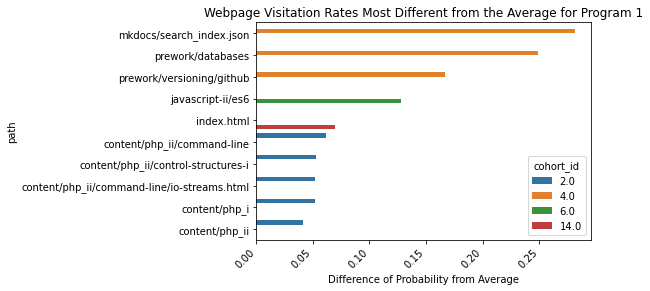

In [240]:
program_1_difference = sns.barplot(y = different_from_average.path, x = different_from_average.difference, hue = different_from_average.cohort_id)
ticks = plt.setp(program_1_difference.get_xticklabels(), rotation = 45, horizontalalignment='right')
labels = program_1_difference.set(Title = "Webpage Visitation Rates Most Different from the Average for Program 1", xlabel = "Difference of Probability from Average")

In [241]:
df[df.cohort_id == 4.0]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-02-04 11:23:27,2018-02-04,11:23:27,mkdocs/search_index.json,85,4.0,66.42.139.162,4.0,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-02-04 11:24:05,2018-02-04,11:24:05,prework/databases,85,4.0,66.42.139.162,4.0,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-02-04 11:24:56,2018-02-04,11:24:56,prework/versioning/github,85,4.0,66.42.139.162,4.0,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0


The DataFrame and graphs above indicate cohorts that are visiting webpages significantly more than the average.

### Key Takeaway

Among cohorts in **Program 1** we can observe that:

- Cohort 4, which was the Denali cohort, was far more likely than other courses to vist the pages:
    - `mkdocs/search_index.json`, 
    - `prework/databses'`, and
    - `prework/versioning/github`
    
  These pages, however, do not appear to be lessons. 
  

- Cohort 6 was more likely to visit `javascript-ii/es6` than other cohorts. 


- Cohort 2 was more likely to visit some of the php lessons that the other cohorts. 

### Program 2

We will perform a similar calculation for **Program 2**, in which we will calculate the difference in each cohort's probability to access a particular page, versus the overall program's probability to access a particular page.

In [242]:
program_2.head()

,program_id,cohort_id,path,proba_path_program
2529,2.0,15.0,java-i,0.028919
2530,2.0,15.0,java-iii,0.019787
2531,2.0,15.0,spring,0.018265
2532,2.0,15.0,spring/fundamentals/controllers,0.018265
2533,2.0,15.0,spring/fundamentals/views,0.016743


In [243]:
average = program_2.groupby("path")['proba_path_program'].mean()
average = pd.DataFrame(average)
average = average.rename(columns = {"proba_path_program": "Average"})
average.head()

,Average
path,
.git,0.000030
.gitignore,0.000030
.well-known/assetlinks.json,0.000072
00_index,0.000084
01_intro,0.000084


In [244]:
median = program_2.groupby("path")['proba_path_program'].median()
median = pd.DataFrame(median)
median = median.rename(columns = {"proba_path_program": "Median"})
median.head()

,Median
path,
.git,0.000030
.gitignore,0.000030
.well-known/assetlinks.json,0.000072
00_index,0.000084
01_intro,0.000084


In [245]:
program_2 = pd.merge(program_2, average, on = "path")
program_2.head()

,program_id,cohort_id,path,proba_path_program,Average
0,2.0,15.0,java-i,0.028919,0.015761
1,2.0,16.0,java-i,0.025316,0.015761
2,2.0,18.0,java-i,0.027000,0.015761
3,2.0,21.0,java-i,0.018645,0.015761
4,2.0,22.0,java-i,0.018018,0.015761


In [246]:
program_2 = pd.merge(program_2, median, on = "path")
program_2.head()

,program_id,cohort_id,path,proba_path_program,Average,Median
0,2.0,15.0,java-i,0.028919,0.015761,0.016601
1,2.0,16.0,java-i,0.025316,0.015761,0.016601
2,2.0,18.0,java-i,0.027000,0.015761,0.016601
3,2.0,21.0,java-i,0.018645,0.015761,0.016601
4,2.0,22.0,java-i,0.018018,0.015761,0.016601


In [247]:
program_2['difference_mean'] = program_2['proba_path_program'] - program_2['Average']

In [248]:
program_2.sort_values(by = "difference_mean", ascending = False).head(20)

,program_id,cohort_id,path,proba_path_program,Average,Median,difference_mean
4439,2.0,139.0,javascript-i/introduction/operators,0.116841,0.012208,0.007167,0.104632
4465,2.0,139.0,javascript-i/introduction/primitive-types,0.115535,0.011514,0.006385,0.104021
1582,2.0,139.0,javascript-i/functions,0.111619,0.014999,0.010310,0.096619
2817,2.0,139.0,javascript-i/conditionals,0.093995,0.012703,0.008634,0.081291
4517,2.0,139.0,javascript-i/introduction/working-with-data-ty...,0.095300,0.015534,0.010419,0.079766
55,2.0,16.0,spring,0.091421,0.019708,0.018044,0.071713
1956,2.0,139.0,javascript-i/javascript-with-html,0.081593,0.014207,0.010316,0.067385
2631,2.0,16.0,index.html,0.088608,0.021640,0.001522,0.066968
545,2.0,139.0,javascript-i,0.088773,0.029887,0.026620,0.058886
4491,2.0,139.0,javascript-i/introduction/variables,0.062010,0.008747,0.005851,0.053264


In [249]:
program_2['difference_median'] = program_2['proba_path_program'] - program_2['Median']

In [250]:
program_2.sort_values(by = "difference_median", ascending = False).head(20)

,program_id,cohort_id,path,proba_path_program,Average,Median,difference_mean,difference_median
4439,2.0,139.0,javascript-i/introduction/operators,0.116841,0.012208,0.007167,0.104632,0.109674
4465,2.0,139.0,javascript-i/introduction/primitive-types,0.115535,0.011514,0.006385,0.104021,0.109151
1582,2.0,139.0,javascript-i/functions,0.111619,0.014999,0.010310,0.096619,0.101309
2631,2.0,16.0,index.html,0.088608,0.021640,0.001522,0.066968,0.087086
2817,2.0,139.0,javascript-i/conditionals,0.093995,0.012703,0.008634,0.081291,0.085361
4517,2.0,139.0,javascript-i/introduction/working-with-data-ty...,0.095300,0.015534,0.010419,0.079766,0.084881
55,2.0,16.0,spring,0.091421,0.019708,0.018044,0.071713,0.073376
1956,2.0,139.0,javascript-i/javascript-with-html,0.081593,0.014207,0.010316,0.067385,0.071276
545,2.0,139.0,javascript-i,0.088773,0.029887,0.026620,0.058886,0.062153
4491,2.0,139.0,javascript-i/introduction/variables,0.062010,0.008747,0.005851,0.053264,0.056160


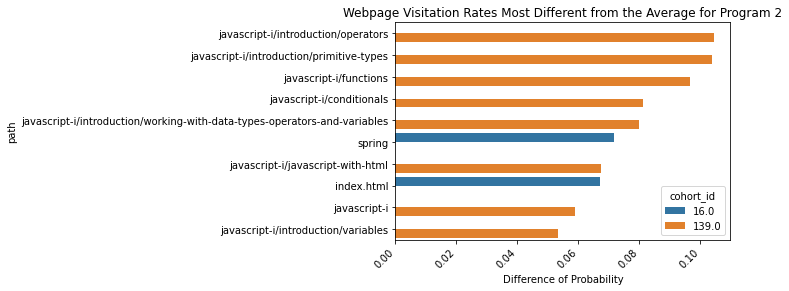

In [253]:
difference_from_mean = program_2.sort_values(by = "difference_mean", ascending = False).head(10)
difference_from_mean_plot = sns.barplot(y = difference_from_mean.path, x = difference_from_mean.difference_mean, hue = difference_from_mean.cohort_id)
ticks = plt.setp(difference_from_mean_plot.get_xticklabels(), rotation = 45, horizontalalignment='right')
labels = difference_from_mean_plot.set(Title = "Webpage Visitation Rates Most Different from the Average for Program 2", xlabel = "Difference of Probability")

In [257]:
df[df.cohort_id == 139.0].head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2021-04-12 16:44:20,2021-04-12,16:44:20,toc,955,139.0,70.121.220.245,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0


In [258]:
df[df.cohort_id == 16.0].head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-01-26 10:59:02,2018-01-26,10:59:02,index.html,21,16.0,71.137.146.71,16.0,Niagara,#niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0


In [259]:
df[df.cohort_id == 135.0].head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2021-01-26 12:18:57,2021-01-26,12:18:57,toc,861,135.0,96.8.248.149,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,2.0


In [260]:
df[df.cohort_id == 138.0].head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2021-03-15 17:00:09,2021-03-15,17:00:09,toc,915,138.0,136.50.104.158,138.0,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0


### Key Takeaways

 - Interestingly, Cohort 139 is far more likely than the other cohorts in **Program 2** to access many of the lessons, specifically Javascript lessons. 
 
     - One explanation is that Cohort 149 began class in April 2021, during the pandemic lockdowns. Thus, they may have been more likely to use the internet. 
     
     - A similar explanation could be given for why Cohorts 135 and 138 are more likely to access the Javascript lessons. 
     
     
 - Cohort 16 was more likely to access the spring page than other cohorts. The reason is not entirely clear.

### Program 3

In [261]:
program_3.head()

,program_id,cohort_id,path,proba_path_program
10262,3.0,34.0,1-fundamentals/1.1-intro-to-data-science,0.029777
10263,3.0,34.0,6-regression/1-overview,0.024240
10264,3.0,34.0,10-anomaly-detection/1-overview,0.017866
10265,3.0,34.0,6-regression/5.0-evaluate,0.015493
10266,3.0,34.0,5-stats/3-probability-distributions,0.014889


In [262]:
program_3.cohort_id.value_counts()

34.0     489
59.0     387
55.0     386
133.0    209
137.0    141
Name: cohort_id, dtype: int64

In [263]:
average = program_3.groupby("path")['proba_path_program'].mean()
average = pd.DataFrame(average)
average = average.rename(columns = {"proba_path_program": "Average"})
average.head()

,Average
path,
%20https://github.com/RaulCPena,0.000058
",%20https://github.com/RaulCPena",0.000058
.gitignore,0.000041
1-fundamentals,0.000415
1-fundamentals/1.1-intro-to-data-science,0.017485


In [264]:
median = program_3.groupby("path")['proba_path_program'].median()
median = pd.DataFrame(median)
median = median.rename(columns = {"proba_path_program": "Median"})
median.head()

,Median
path,
%20https://github.com/RaulCPena,0.000058
",%20https://github.com/RaulCPena",0.000058
.gitignore,0.000041
1-fundamentals,0.000415
1-fundamentals/1.1-intro-to-data-science,0.019087


In [265]:
program_3 = pd.merge(program_3, average, on = "path")
program_3.head()

,program_id,cohort_id,path,proba_path_program,Average
0,3.0,34.0,1-fundamentals/1.1-intro-to-data-science,0.029777,0.017485
1,3.0,55.0,1-fundamentals/1.1-intro-to-data-science,0.026855,0.017485
2,3.0,59.0,1-fundamentals/1.1-intro-to-data-science,0.019087,0.017485
3,3.0,133.0,1-fundamentals/1.1-intro-to-data-science,0.000726,0.017485
4,3.0,137.0,1-fundamentals/1.1-intro-to-data-science,0.010978,0.017485


In [266]:
program_3 = pd.merge(program_3, median, on = "path")
program_3.head()

,program_id,cohort_id,path,proba_path_program,Average,Median
0,3.0,34.0,1-fundamentals/1.1-intro-to-data-science,0.029777,0.017485,0.019087
1,3.0,55.0,1-fundamentals/1.1-intro-to-data-science,0.026855,0.017485,0.019087
2,3.0,59.0,1-fundamentals/1.1-intro-to-data-science,0.019087,0.017485,0.019087
3,3.0,133.0,1-fundamentals/1.1-intro-to-data-science,0.000726,0.017485,0.019087
4,3.0,137.0,1-fundamentals/1.1-intro-to-data-science,0.010978,0.017485,0.019087


In [267]:
program_3['difference_mean'] = program_3['proba_path_program'] - program_3['Average']
program_3.sort_values(by = "difference_mean", ascending = False).head(20)

,program_id,cohort_id,path,proba_path_program,Average,Median,difference_mean
390,3.0,137.0,fundamentals/intro-to-data-science,0.105489,0.031729,0.012656,0.073760
419,3.0,137.0,python/data-types-and-variables,0.044254,0.013467,0.010581,0.030787
350,3.0,59.0,classification/overview,0.046017,0.021245,0.010292,0.024771
688,3.0,137.0,fundamentals/data-science-pipeline,0.032419,0.010181,0.004855,0.022238
609,3.0,137.0,sql/joins,0.031904,0.010322,0.007635,0.021582
709,3.0,137.0,sql/mysql-introduction,0.028302,0.008747,0.004149,0.019555
351,3.0,133.0,classification/overview,0.040366,0.021245,0.010292,0.019121
752,3.0,137.0,sql/functions,0.028473,0.009941,0.007095,0.018533
667,3.0,137.0,sql/tables,0.026415,0.008072,0.003817,0.018343
747,3.0,137.0,sql/databases,0.025557,0.007806,0.003817,0.017751


In [268]:
program_3['difference_median'] = program_3['proba_path_program'] - program_3['Median']
program_3.sort_values(by = "difference_median", ascending = False).head(20)

,program_id,cohort_id,path,proba_path_program,Average,Median,difference_mean,difference_median
390,3.0,137.0,fundamentals/intro-to-data-science,0.105489,0.031729,0.012656,0.073760,0.092833
350,3.0,59.0,classification/overview,0.046017,0.021245,0.010292,0.024771,0.035725
419,3.0,137.0,python/data-types-and-variables,0.044254,0.013467,0.010581,0.030787,0.033673
351,3.0,133.0,classification/overview,0.040366,0.021245,0.010292,0.019121,0.030075
688,3.0,137.0,fundamentals/data-science-pipeline,0.032419,0.010181,0.004855,0.022238,0.027564
609,3.0,137.0,sql/joins,0.031904,0.010322,0.007635,0.021582,0.024269
709,3.0,137.0,sql/mysql-introduction,0.028302,0.008747,0.004149,0.019555,0.024153
667,3.0,137.0,sql/tables,0.026415,0.008072,0.003817,0.018343,0.022598
747,3.0,137.0,sql/databases,0.025557,0.007806,0.003817,0.017751,0.021740
657,3.0,137.0,fundamentals/git,0.025729,0.008757,0.004315,0.016972,0.021414


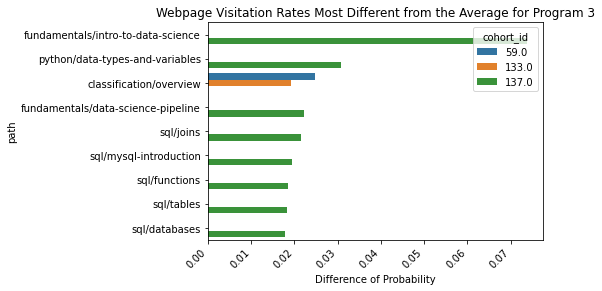

In [270]:
difference_from_mean = program_3.sort_values(by = "difference_mean", ascending = False).head(10)
difference_from_mean_plot = sns.barplot(y = difference_from_mean.path, x = difference_from_mean.difference_mean, hue = difference_from_mean.cohort_id)
ticks = plt.setp(difference_from_mean_plot.get_xticklabels(), rotation = 45, horizontalalignment='right')
labels = difference_from_mean_plot.set(Title = "Webpage Visitation Rates Most Different from the Average for Program 3", xlabel = "Difference of Probability")

In [272]:
df[df.cohort_id == 137.0].head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2021-03-15 15:24:05,2021-03-15,15:24:05,fundamentals/intro-to-data-science,898,137.0,208.84.155.68,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0


In [273]:
df[df.cohort_id == 133.0].head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2020-12-08 10:50:26,2020-12-08,10:50:26,python/data-types-and-variables,838,133.0,99.158.249.67,133.0,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0


In [274]:
df[df.cohort_id == 59.0].head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2020-07-13 14:39:21,2020-07-13,14:39:21,13-advanced-topics/1-tidy-data,679,59.0,24.28.146.155,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0


### Key Takeaways

 - Students in Cohort 137, the Florence cohort, are more likely to access many of the lessons online than other cohorts in **Program 3**, including fundamentals, python, classification, etcetera. 
 
     - Florence was an entirely online cohort, so this conclusion makes sense.
     
 - Cohorts 59 and 133, the Darden and Easley cohorts, were more likelt to access the online lessons for classification than other cohorts. 
 
     - Cohort 133 took place during the pandemic. 
     
     - A clear explanation for Cohort 59 is not immediately obvious.

## Question 3 

Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

To answer this question, we will create a table with the amount of times that each user accessed the curriculum when they are an active student of the course.

In [51]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:41,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [55]:
active_students = df[df.index < df.end_date]

In [56]:
active_students.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:41,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:46,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:48,2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:59,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [126]:
times_each_user_appears = pd.DataFrame(active_students.user_id.value_counts())

In [97]:
times_each_user_appears.head()

,user_id
344,4637
570,3923
671,2984
823,2814
794,2760


In [105]:
times_each_user_appears[64:65]

,counts
234,1625


In [98]:
#Rename the user_id count column as number
times_each_user_appears = times_each_user_appears.rename(columns = {'user_id': 'counts'})
times_each_user_appears.head()

,counts
344,4637
570,3923
671,2984
823,2814
794,2760


In [99]:
#Calculate users with only one hit
times_each_user_appears[times_each_user_appears.counts == 1.0]

,counts


In [100]:
#Caculate users with less than five hits
less_than_twenty = times_each_user_appears[times_each_user_appears.counts < 20.0]
less_than_twenty

,counts
961,18
340,17
487,16
968,15
963,15
64,15
889,14
572,11
941,10
812,7


In [130]:
for user in less_than_twenty.index:
    print(user, "value counts:", len(df[df.user_id == user]))

961 value counts: 18
340 value counts: 17
487 value counts: 16
968 value counts: 15
963 value counts: 15
889 value counts: 14
572 value counts: 11
941 value counts: 10
812 value counts: 16
697 value counts: 7
388 value counts: 7
679 value counts: 4
539 value counts: 4
956 value counts: 4
278 value counts: 63
832 value counts: 2


User 64 has doen multiple programs and thus is confusing our dataset. This is likely also the case for user 278. We will remove this user from our dataset.

In [113]:
less_than_twenty = less_than_twenty.drop([64])

In [131]:
less_than_twenty = less_than_twenty.drop([278])

In [132]:
less_than_twenty

,counts
961,18
340,17
487,16
968,15
963,15
889,14
572,11
941,10
812,7
697,7


In [133]:
less_than_twenty_df = df[df.user_id.isin(less_than_twenty.index)]
less_than_twenty_df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2019-01-22 15:23:39,2019-01-22,15:23:39,toc,340,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0
2019-01-22 15:33:44,2019-01-22,15:33:44,toc,340,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0
2019-01-22 16:49:33,2019-01-22,16:49:33,toc,340,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0
2019-01-22 16:49:49,2019-01-22,16:49:49,html-css,340,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0
2019-01-22 16:50:45,2019-01-22,16:50:45,toc,340,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0


We now have a DataFrame of users with less than five hits. Who are these users?

First we will calculate what the most frequently accessed paths for uses with less than twenty hits are.

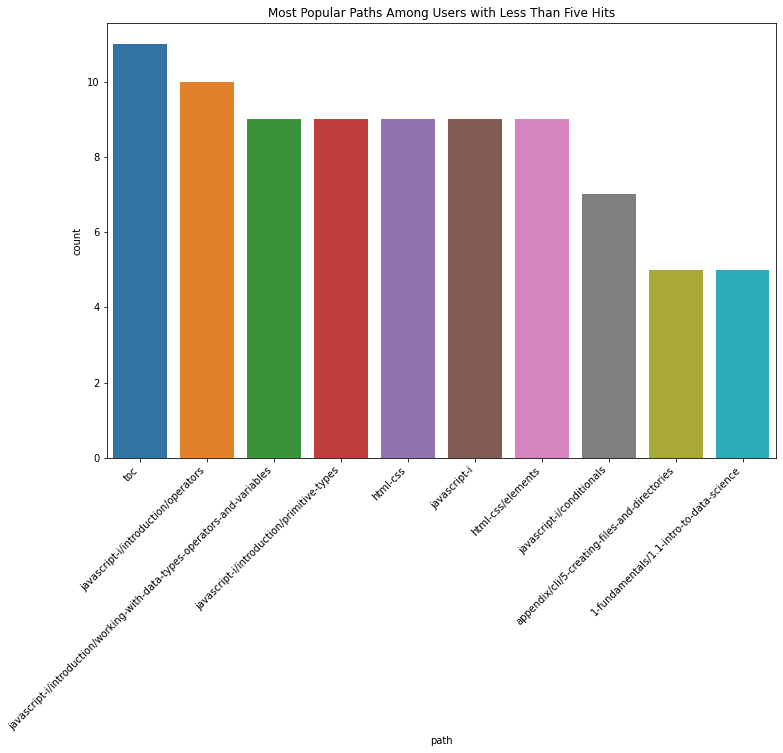

In [136]:
plt.figure(figsize = (12,8))
most_popular_paths = sns.countplot(x=less_than_twenty_df['path'], order = less_than_twenty_df['path'].value_counts()[0:10].index)
labels = ticks = plt.setp(most_popular_paths.get_xticklabels(), rotation = 45, horizontalalignment='right')
titles = most_popular_paths.set(Title = "Most Popular Paths Among Users with Less Than Five Hits")

### Key Takeaway

 - The most accessed page among users with less than twenty hits is the table of contents. However, this page is not a lesson. 
 - The most popular lessons among users with less than five hits are 
     - javascript-i/introduction/operators,
     - javascript-i/introduction/working-with-data-types-operators-and-variables,
     - javascript/introduction/primitive-types 
     - javascript-i 

These are likely students who dropped out after the beginning of the course.

We can explore other features of students with less than five hits. 

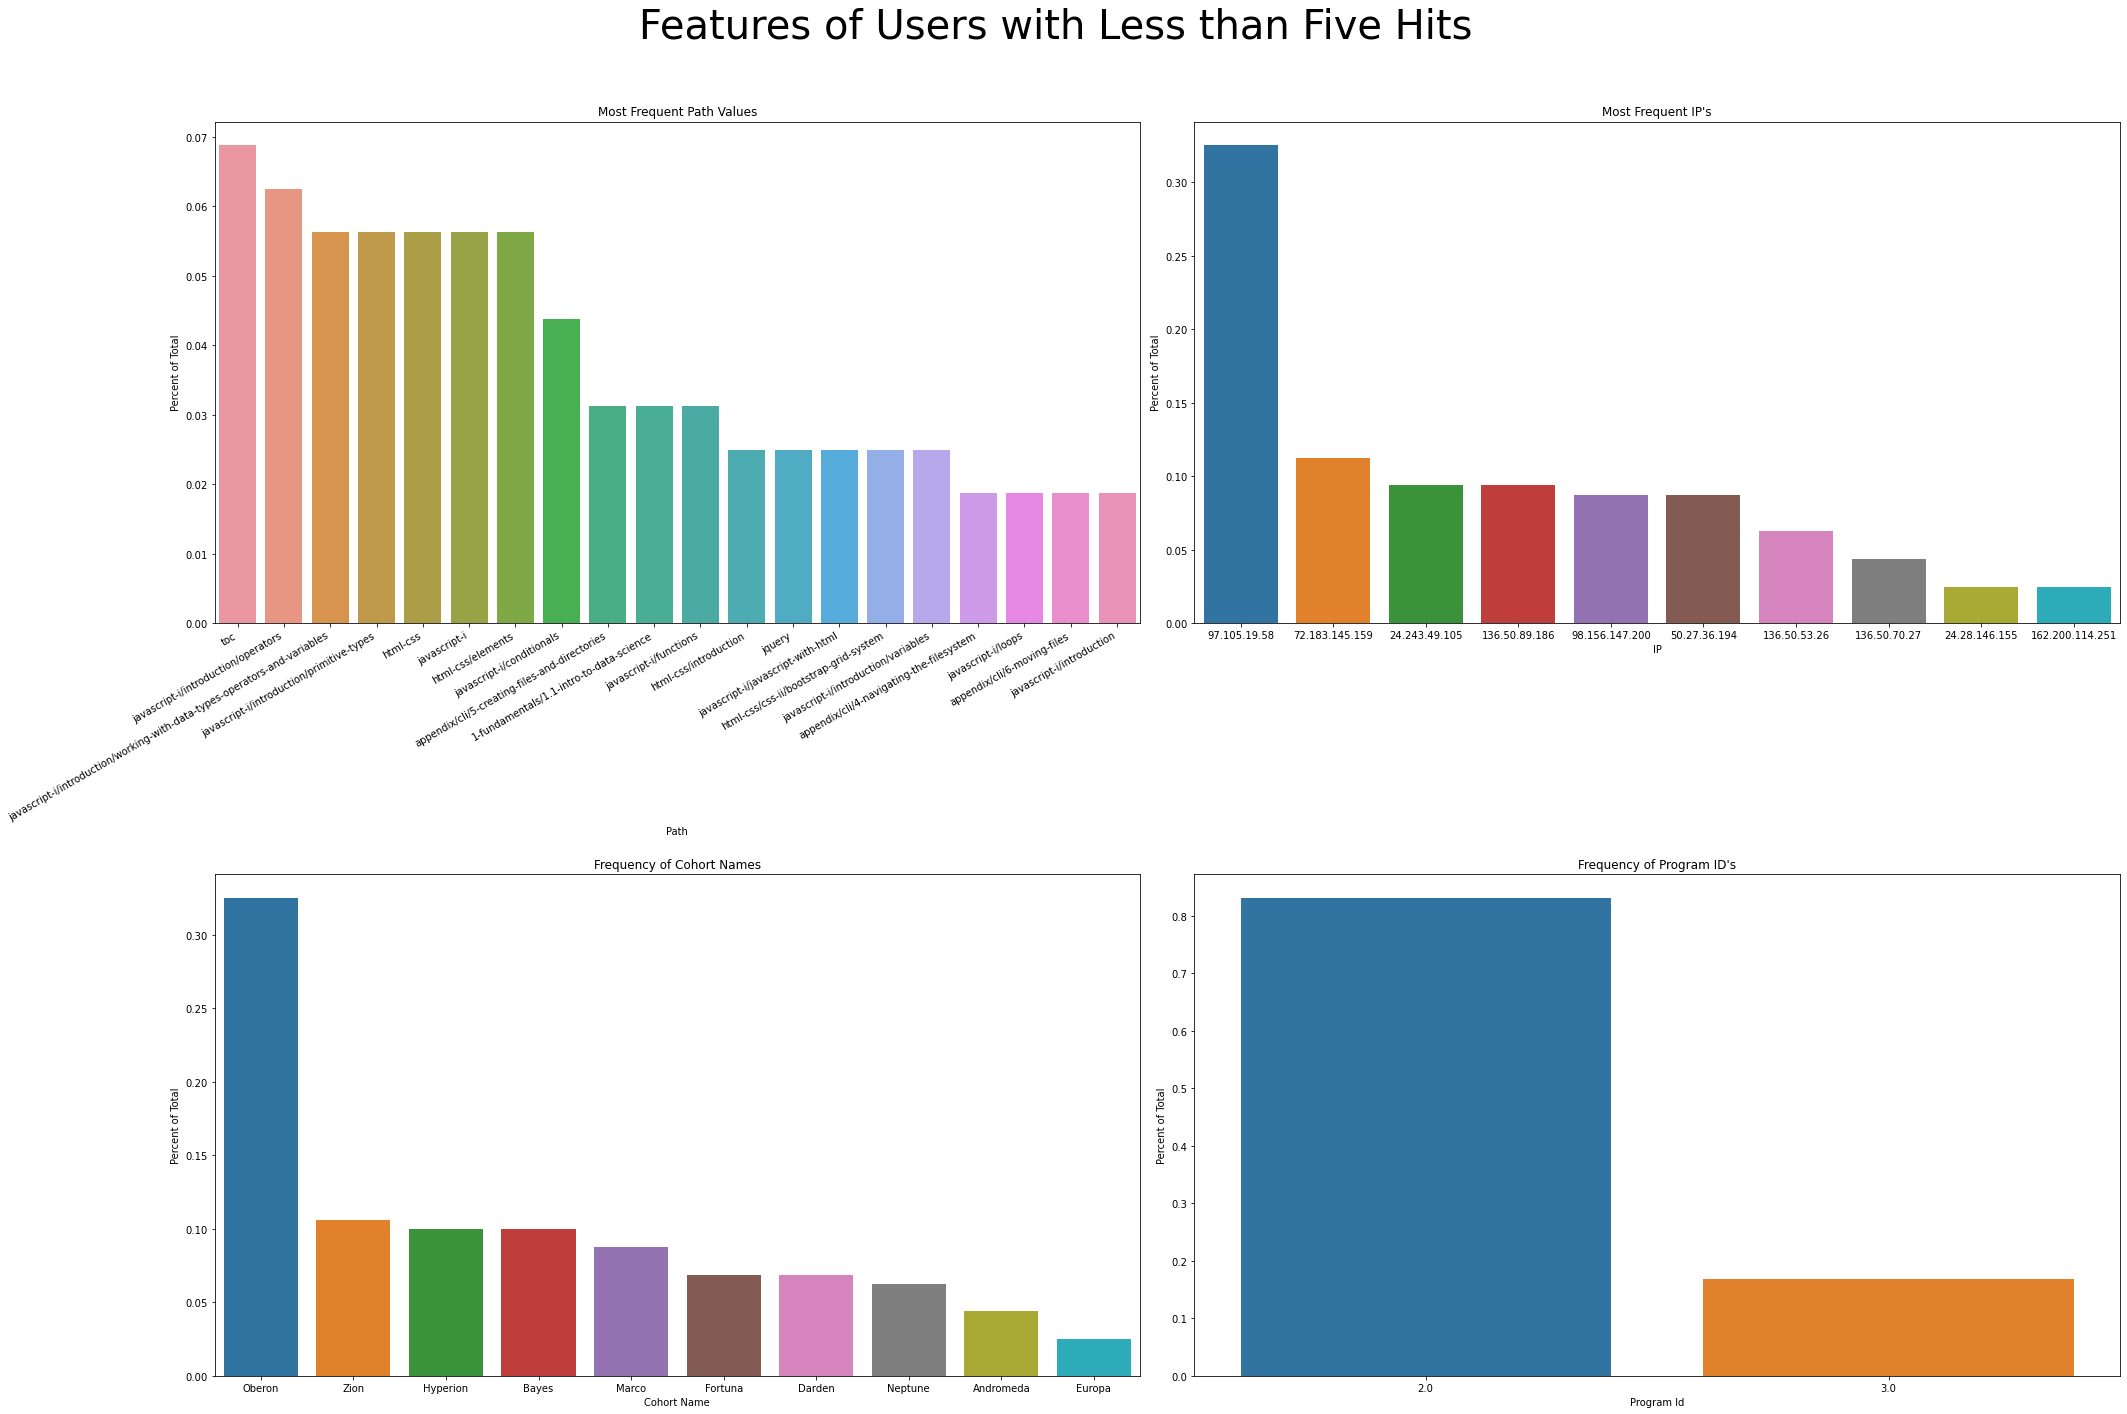

In [137]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (30, 20))
fig.suptitle('Features of Users with Less than Five Hits', fontsize = 40)
#Path
paths_for_less_than_twenty = sns.barplot(x='index', y='path', data=less_than_twenty_df['path'].value_counts(normalize=True).reset_index().sort_values(
        by='path', ascending=False)[0:20], ax=axs[0,0])
ticks = plt.setp(paths_for_less_than_twenty.get_xticklabels(), rotation = 30, horizontalalignment='right')
paths_for_less_than_twenty.set(title = "Most Frequent Path Values", xlabel = "Path", ylabel = "Percent of Total")
#IP Address
sns.barplot(x='index', y='ip', data=less_than_twenty_df['ip'].value_counts(normalize=True).reset_index().sort_values(
        by='ip', ascending=False).head(10), ax=axs[0, 1]).set(Title = "Most Frequent IP's", xlabel = "IP", ylabel = "Percent of Total")
#Cohort Names
sns.barplot(x='index', y='name', data=less_than_twenty_df['name'].value_counts(normalize=True).reset_index().sort_values(
        by='name', ascending=False).head(10), ax=axs[1, 0]).set(Title = "Frequency of Cohort Names", xlabel = "Cohort Name", ylabel = "Percent of Total")
#Program ID
sns.barplot(x='index', y='program_id', data=less_than_twenty_df['program_id'].value_counts(normalize=True).reset_index().sort_values(
        by='program_id', ascending=False), ax=axs[1, 1]).set(Title = "Frequency of Program ID's", xlabel = "Program Id", ylabel = "Percent of Total")

fig.tight_layout()
fig.subplots_adjust(top=0.9, hspace = 0.5)

### Key Takeaways 

 - The most frequent IP address for students with less than twenty hits are: 
     - 97.105.19.58,  
     - 72.183.145.159, and 
     - 29.243.49.105.
 - By far the cohort with the most inactive users Oberon, followed by Zion. 
 
 - Program 2 has more students with less than twenty hits than Program 3. 
     - This makes sense because Program 3 has less students than Program 1 and Program 2. 
     - However, Program 2 has more students than Program 1, yet these two Programs 1 has no students who underengage with the curriculum.
        - This may indicate tha Program 2 has a higher drop out rate than Program 1.


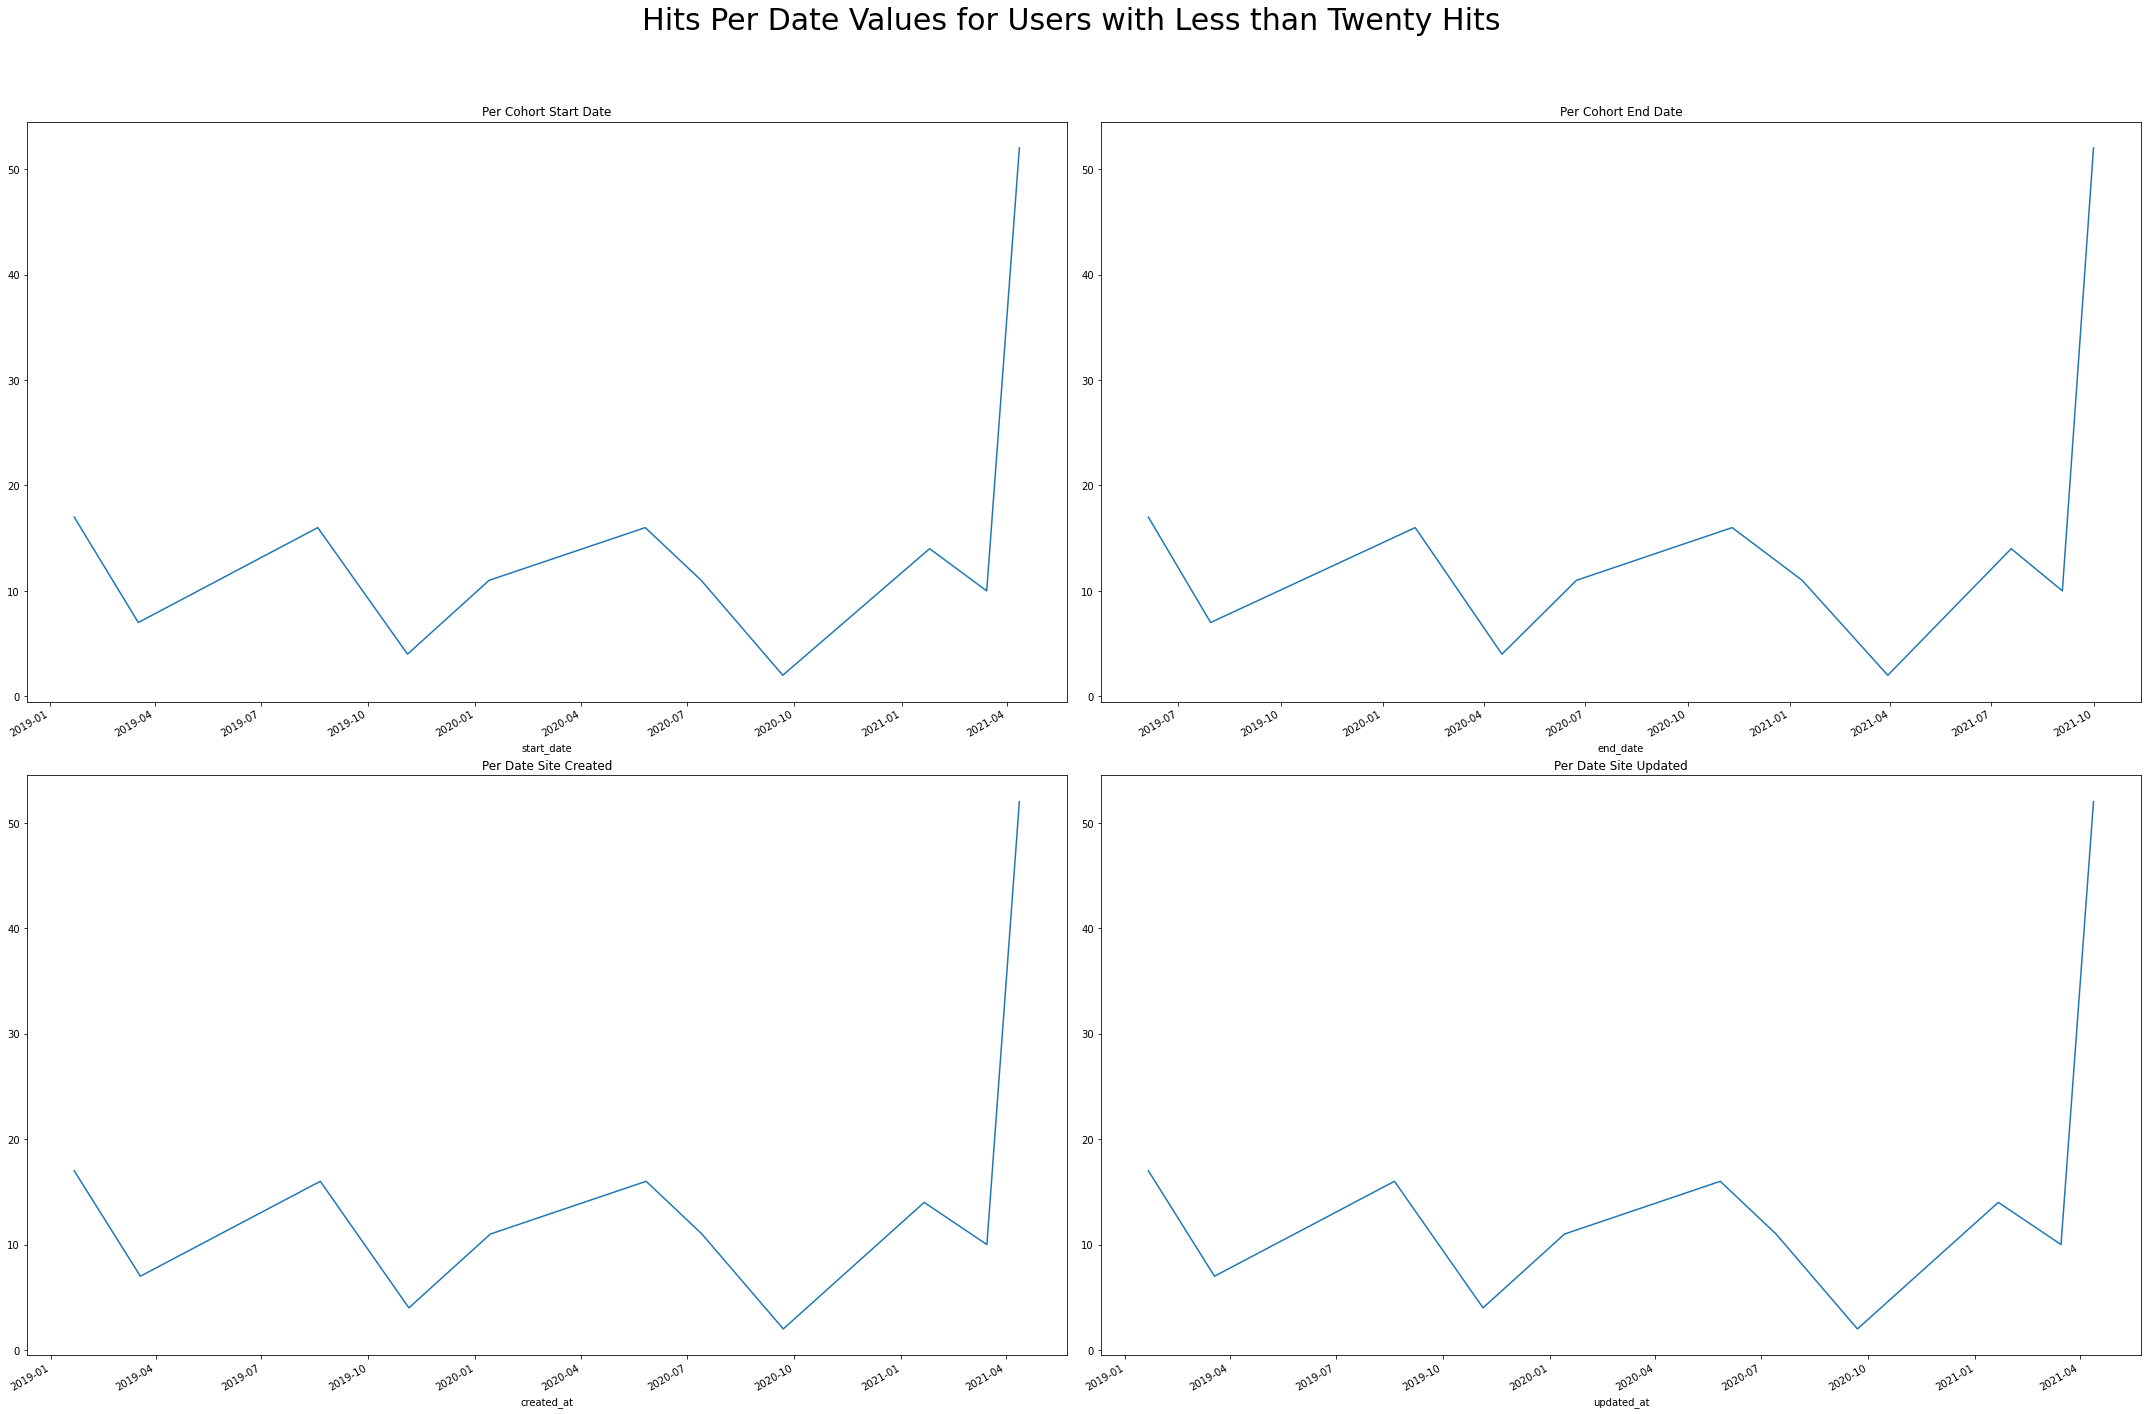

In [138]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (30, 20))
fig.suptitle('Hits Per Date Values for Users with Less than Twenty Hits', fontsize = 30)

less_than_twenty_df.groupby('start_date').ip.count().plot(ax=axs[0, 0]).set(Title = "Per Cohort Start Date")

less_than_twenty_df.groupby('end_date').ip.count().plot(ax=axs[0, 1]).set(Title = "Per Cohort End Date")

less_than_twenty_df.groupby('created_at').ip.count().plot(ax=axs[1, 0]).set(Title = "Per Date Site Created")

less_than_twenty_df.groupby('updated_at').ip.count().plot(ax=axs[1, 1]).set(Title = "Per Date Site Updated")

fig.tight_layout()
fig.subplots_adjust(top=0.9)



### Key Takeaways

 - For every metric, there is a general increase, especially in mid-2021. 
 - This means the majority of the students who did not access the curiculum were looking at curiculum written after 2021 and finsihed the course before 2021.
 - Inactivity is cyclical, peaking in the summer months.
 - Students are probably more likely to drop out in the summer.

We will take a closer look at the cohorts with an especially high rate of students with less than twenty hits.

In [139]:
less_than_twenty_df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2019-01-22 15:23:39,2019-01-22,15:23:39,toc,340,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0
2019-01-22 15:33:44,2019-01-22,15:33:44,toc,340,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0
2019-01-22 16:49:33,2019-01-22,16:49:33,toc,340,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0
2019-01-22 16:49:49,2019-01-22,16:49:49,html-css,340,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0
2019-01-22 16:50:45,2019-01-22,16:50:45,toc,340,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0


In [140]:
less_than_twenty_df[less_than_twenty_df.name == "Oberon"].user_id.value_counts()

961    18
963    15
968    15
956     4
Name: user_id, dtype: int64

In [146]:
df[df.name == "Oberon"].head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2021-04-12 16:44:20,2021-04-12,16:44:20,toc,955,139.0,70.121.220.245,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0


In [144]:
less_than_twenty_df[less_than_twenty_df.name == "Zion"].user_id.value_counts()

340    17
Name: user_id, dtype: int64

In [147]:
df[df.name == "Zion"].head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2019-01-22 15:10:01,2019-01-22,15:10:01,toc,323,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0


In [145]:
less_than_twenty_df[less_than_twenty_df.name == "Hyperion"].user_id.value_counts()

812    16
Name: user_id, dtype: int64

In [148]:
df[df.name == "Hyperion"].head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2020-05-26 17:03:59,2020-05-26,17:03:59,toc,655,58.0,107.128.2.166,58.0,Hyperion,#hyperion,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,2.0


### Key Takeaway

 - The cohort with the most likely dropouts (Oberon) took place in the summer, which is when we suggested that students were more likely to drop out. 
 - As we suspected, these students are accessing the introductory content, meaning they probably dropped out early onz.

## Question 6

What topics are grads continuing to reference after graduation and into their jobs (for each program)

In [5]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:41,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


To answer this question, we will create a DataFrame that only contains data for students accessing the curriculum after graduation.

In [343]:
after_graduation = df[df.index < df.end_date]

In [344]:
after_graduation.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:41,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:46,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:48,2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:59,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


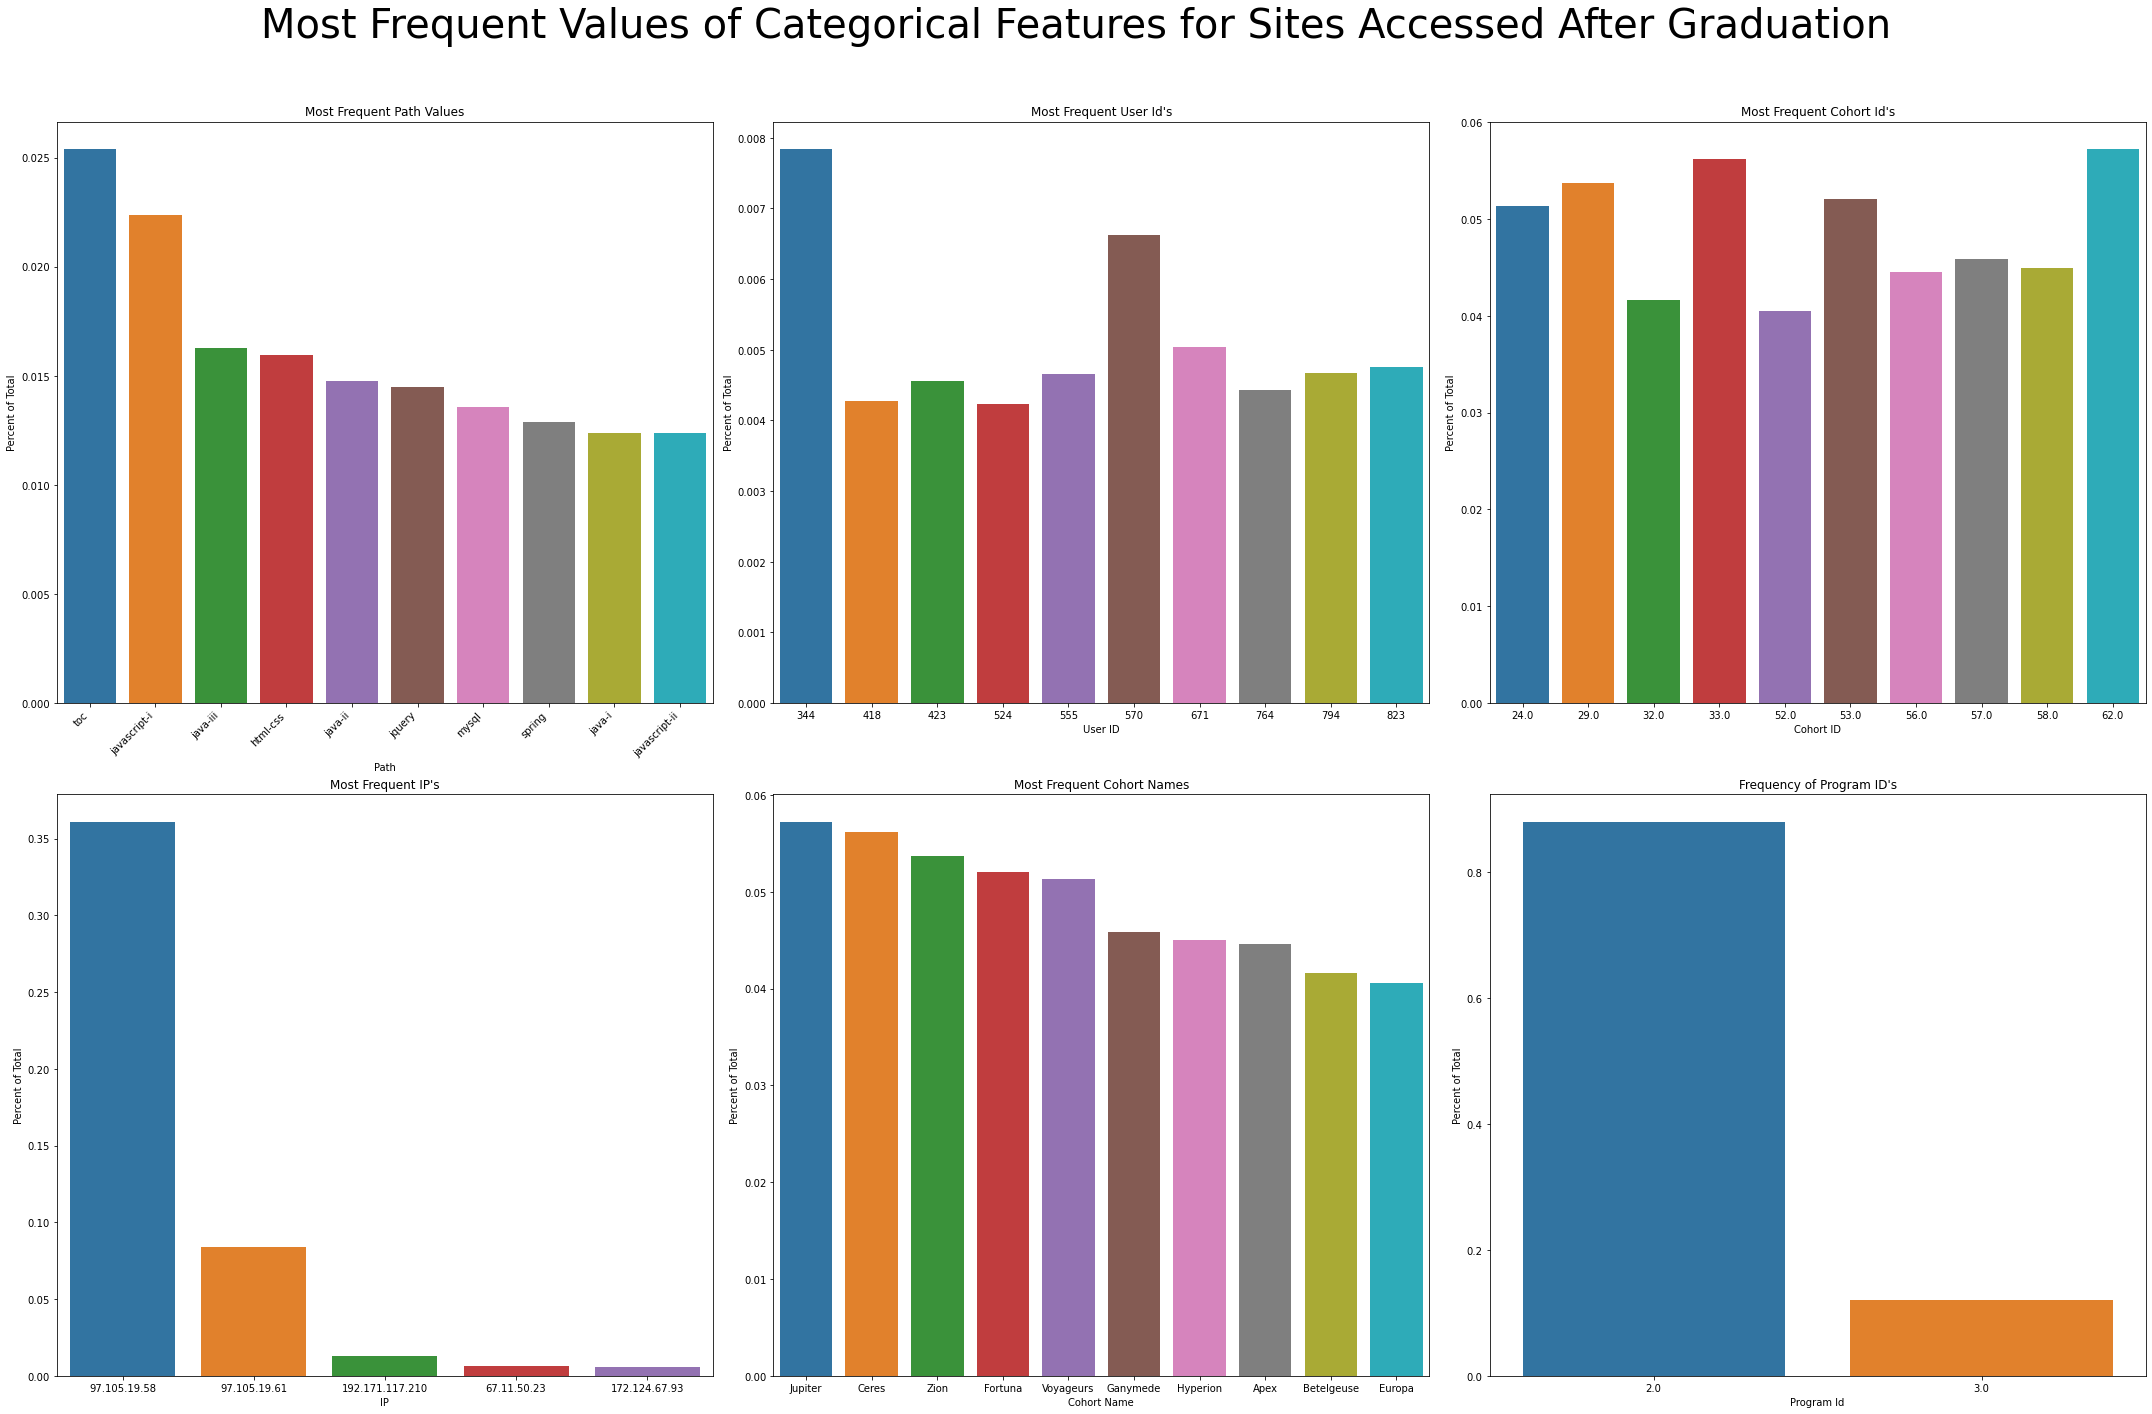

In [345]:
fig, axs = plt.subplots(ncols=3, nrows = 2, figsize = (30, 20))
fig.suptitle('Most Frequent Values of Categorical Features for Sites Accessed After Graduation', fontsize = 40)
#Path
path_plots = sns.barplot(x='index', y='path', data=after_graduation['path'].value_counts(normalize=True).reset_index().sort_values(
        by='path', ascending=False).head(10), ax=axs[0, 0])
path_plots.set(title = "Most Frequent Path Values", xlabel = "Path", ylabel = "Percent of Total")
ticks = plt.setp(path_plots.get_xticklabels(), rotation = 45, horizontalalignment='right')
#User ID
sns.barplot(x='index', y='user_id', data=after_graduation['user_id'].value_counts(normalize=True).reset_index().sort_values(
        by='user_id', ascending=False).head(10), ax=axs[0, 1]).set(Title = "Most Frequent User Id's", xlabel = "User ID", ylabel = "Percent of Total")
#Cohort ID
sns.barplot(x='index', y='cohort_id', data=after_graduation['cohort_id'].value_counts(normalize=True).reset_index().sort_values(
        by='cohort_id', ascending=False).head(10), ax=axs[0, 2]).set(Title = "Most Frequent Cohort Id's", xlabel = "Cohort ID", ylabel = "Percent of Total")
#IP Address
sns.barplot(x='index', y='ip', data=after_graduation['ip'].value_counts(normalize=True).reset_index().sort_values(
        by='ip', ascending=False).head(5), ax=axs[1, 0]).set(Title = "Most Frequent IP's", xlabel = "IP", ylabel = "Percent of Total")
#Cohort Names
sns.barplot(x='index', y='name', data=after_graduation['name'].value_counts(normalize=True).reset_index().sort_values(
        by='name', ascending=False).head(10), ax=axs[1, 1]).set(Title = "Most Frequent Cohort Names", xlabel = "Cohort Name", ylabel = "Percent of Total")
#Program ID
sns.barplot(x='index', y='program_id', data=after_graduation['program_id'].value_counts(normalize=True).reset_index().sort_values(
        by='program_id', ascending=False), ax=axs[1, 2]).set(Title = "Frequency of Program ID's", xlabel = "Program Id", ylabel = "Percent of Total")

fig.tight_layout()
fig.subplots_adjust(top=0.9)

In [346]:
after_graduation[after_graduation.program_id == 1.0]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,


In [362]:
df[df.program_id==1].end_date.min()

Timestamp('2014-04-22 00:00:00')

In [361]:
df[df.program_id==1].end_date.max()

Timestamp('2017-09-22 00:00:00')

### Key Takeaways 

 - The most popular lessons among students after graduation are:
     - javascript-i, 
     - java-iii, 
     - java-ii, 
     - jquery, 
     - msql 
     - java-i, 
     - javascript-ii 
 - Certain users, such as users 244 and 570 are more likely to review the curriculum after graduation. 
 
 - Cohorts such as Jupyter, Ceres, Zion, Fortuna, and Voyageurs have more visits to the curriculum after graduation than other cohorts. 
 
 - None of the students from Program 1 reviewed the curriculum after graduation. 
     - Program 1 appears to be an inactive program, as the most recent graduation date was in 2017.
 
 - By far the most common IP address for reviewing the curriculum after graduation came from IP address 97.105.19.58.

In [347]:
after_graduation.groupby('end_date').ip.count()

end_date
2018-02-15     2008
2018-05-17    23968
2018-07-19    22951
2018-10-11    30388
2018-11-29    22591
2019-02-08    21436
2019-04-03    18087
2019-06-04    31767
2019-07-30    20100
2019-10-08    24653
2019-12-11    33269
2020-01-30    17949
2020-02-27    23478
2020-04-17    23987
2020-06-23    30786
2020-07-07    14774
2020-07-29    26379
2020-08-20    27117
2020-11-10    26613
2021-01-12    21929
2021-01-21    15064
2021-03-30    33854
2021-05-04    22285
2021-06-08    26751
2021-07-19    15457
2021-09-03    12557
2021-10-01     1532
Name: ip, dtype: int64

In [348]:
after_graduation.groupby('created_at').ip.count()

created_at
2017-09-27 20:22:41     2008
2018-01-08 13:59:10    23968
2018-03-05 14:22:11    22951
2018-05-25 22:25:57    30388
2018-07-23 15:02:25    22591
2018-09-17 19:09:51    21436
2018-11-05 15:26:37    18087
2019-01-20 23:18:57    31767
2019-03-18 20:35:06    20100
2019-05-28 18:41:05    24653
2019-07-15 16:57:21    33269
2019-08-20 14:38:55    17949
2019-09-16 13:07:04    23478
2019-11-04 18:27:07    23987
2020-01-13 21:17:08    30786
2020-02-03 19:31:51    14774
2020-02-24 15:39:33    26379
2020-03-23 17:52:16    27117
2020-05-26 19:22:44    26613
2020-07-13 18:32:19    21929
2020-07-20 19:04:00    15064
2020-09-21 18:06:27    33854
2020-11-02 20:43:58    22285
2020-12-07 15:20:18    11024
2020-12-07 16:58:43    15727
2021-01-20 21:31:11    15457
2021-03-15 18:18:20     5830
2021-03-15 19:57:09     6727
2021-04-12 18:07:21     1532
Name: ip, dtype: int64

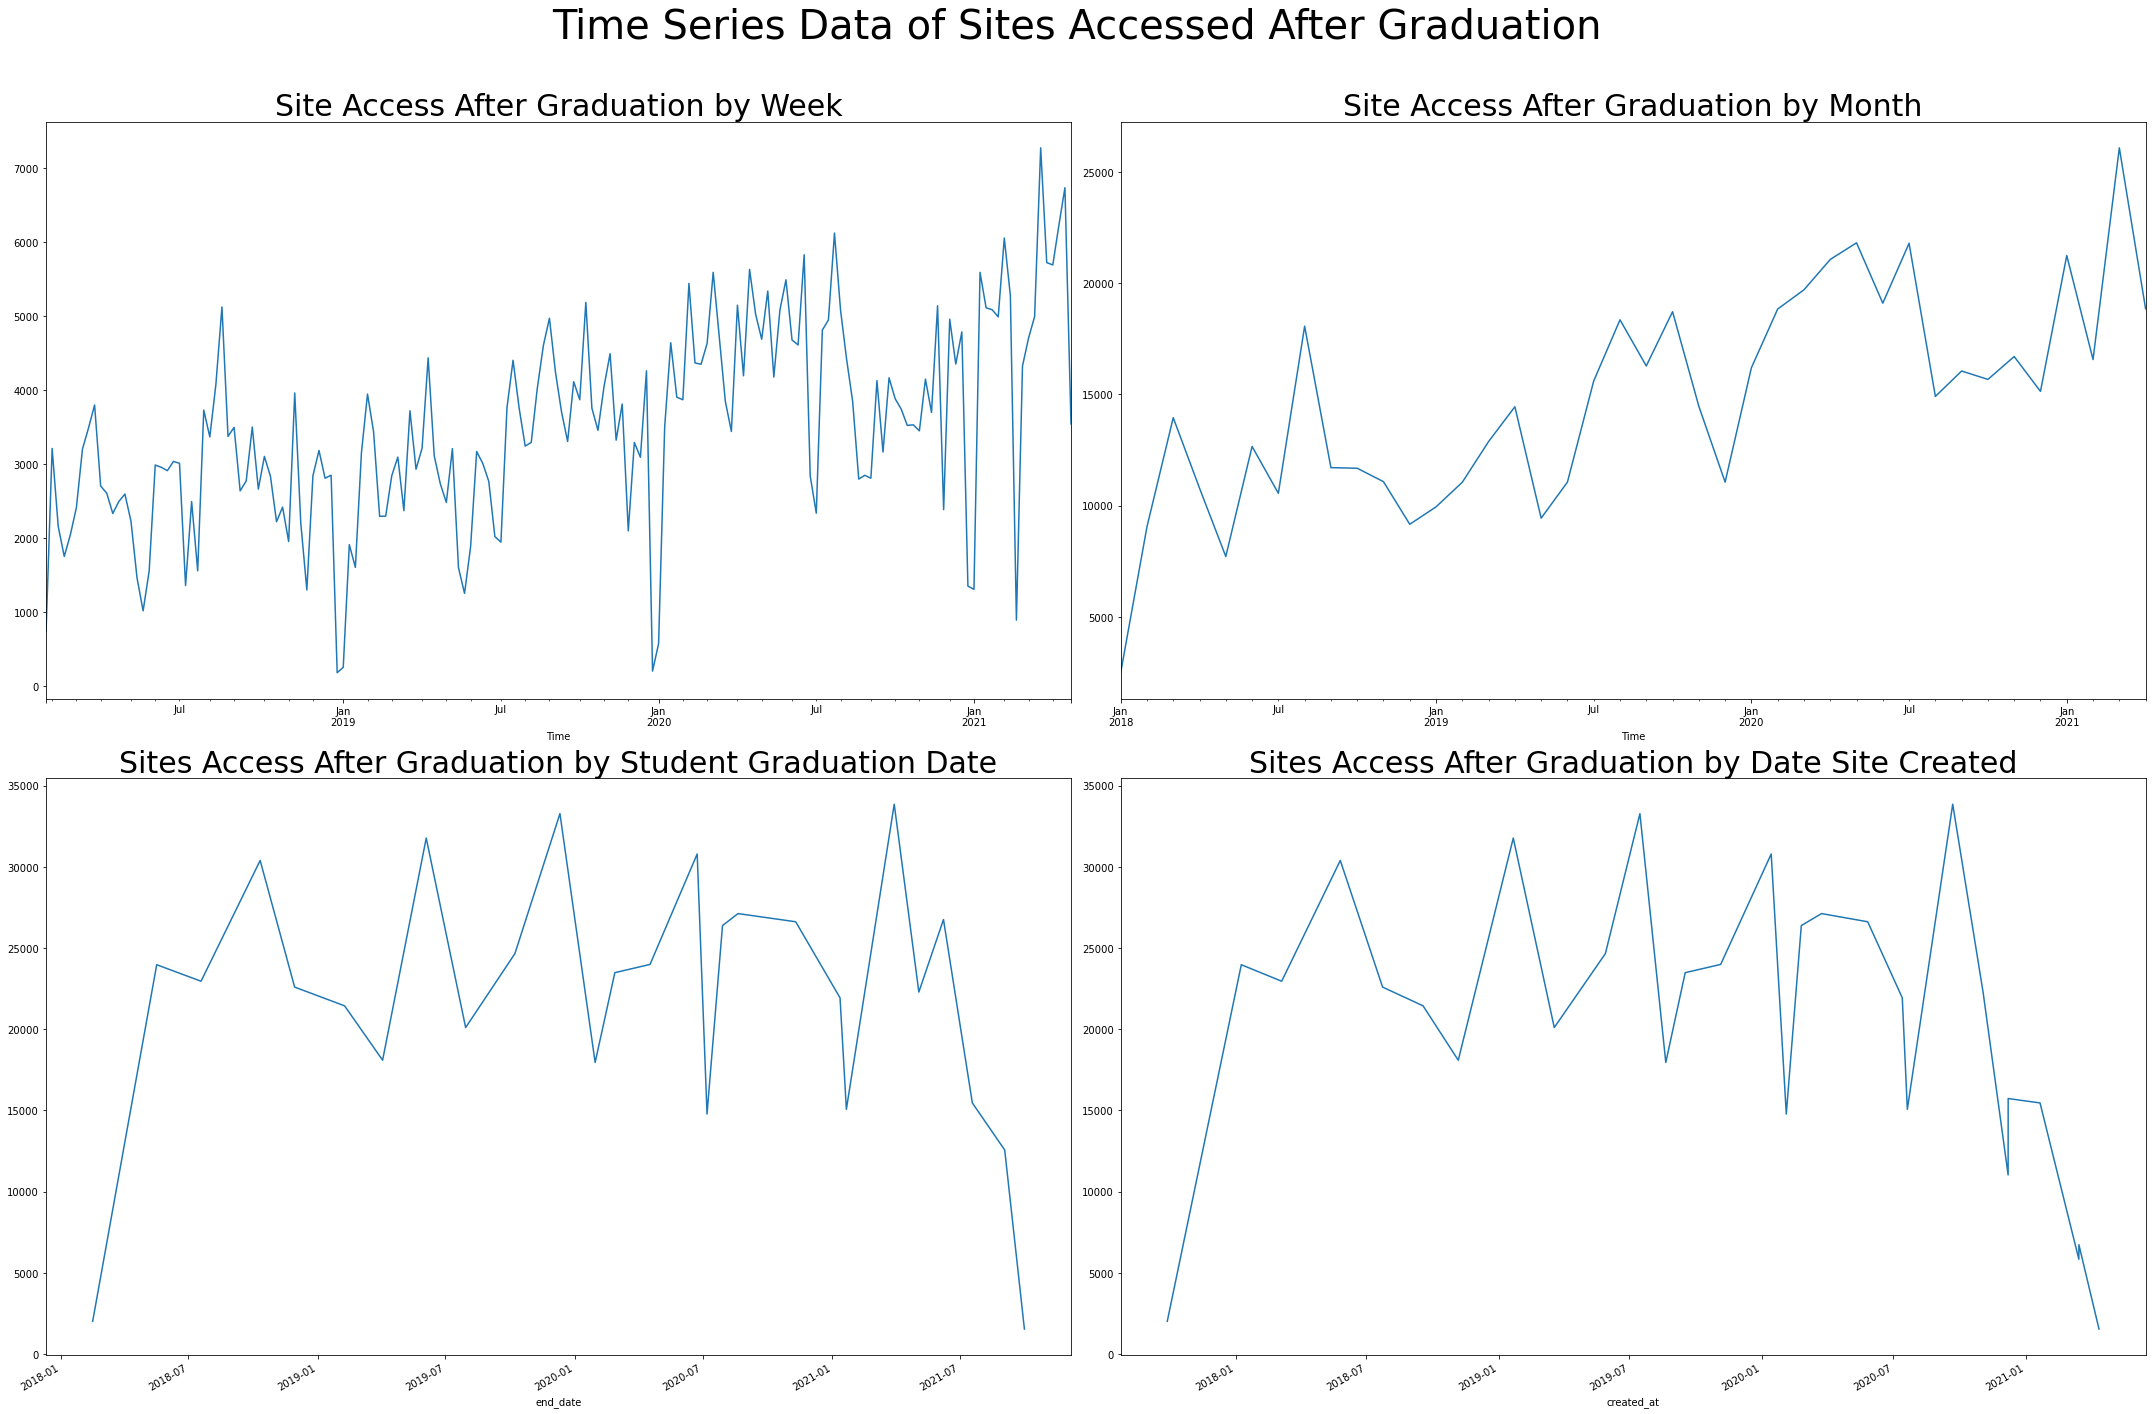

In [338]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (30, 20))

fig.suptitle('Time Series Data of Sites Accessed After Graduation', fontsize = 40)


number_of_sites_accessed_week = after_graduation.resample('W').ip.count().plot(ax = axs[0,0])
number_of_sites_accessed_week.set_title("Site Access After Graduation by Week", fontsize = 30)

number_of_sites_accessed_month = after_graduation.resample('M').ip.count().plot(ax = axs[0,1])
number_of_sites_accessed_month.set_title("Site Access After Graduation by Month", fontsize = 30)

number_of_sites_accessed_end_date = after_graduation.groupby('end_date').ip.count().plot(ax=axs[1, 0])
number_of_sites_accessed_end_date.set_title("Sites Access After Graduation by Student Graduation Date", fontsize = 30)

number_of_sites_accessed_date = after_graduation.groupby('created_at').ip.count().plot(ax=axs[1, 1])
number_of_sites_accessed_date.set_title("Sites Access After Graduation by Date Site Created", fontsize = 30)



fig.tight_layout()
fig.subplots_adjust(top=0.9)

In [356]:
after_graduation[after_graduation.created_at == "2017-09-27 20:22:41"].name.value_counts()

Sequoia    2008
Name: name, dtype: int64

In [358]:
df[df.name == "Sequoia"].head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-01-26 10:08:22,2018-01-26,10:08:22,mkdocs/search_index.json,10,21.0,97.105.19.61,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0


### Key Takeaways 

 - The overall trend is that students are accessing the curriculum more and more after graduation. This is likely because there are more students. 
 - There is a sharp decline in students accesing the curriculum during the winter Holidays. 
 - Students with a graduation date in winter and summer seem to have less post-graduation site access than students with other graduation dates. 
 - The earliest graduate date for which students still access the curriculum is February 2018.
 - The oldest path that students accessed after graduation was created in September 2017. 
     - All of the students who accessed pages from September 2017 are from the Sequoia cohort, who graduated in February 2018. 
 - Most of the other sites accessed after graduation were created more recently.

We will now look at what sites the students are accessing after graduation based on the Program that the student studied in. Recall that no students from Program 1 accessed the curriculum after graduation.

### Program 2

In [366]:
program_2 = after_graduation[after_graduation.program_id == 2.0]
program_2.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:41,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:46,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:48,2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26 09:56:59,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [368]:
program_2_df = pd.DataFrame(program_2.path.value_counts())
program_2_df.head()

,path
toc,15006
javascript-i,13224
java-iii,9621
html-css,9424
java-ii,8729


In [372]:
program_2_df = program_2_df.rename(columns = {'path': 'counts'})

In [373]:
program_2_df.head()

,counts
toc,15006
javascript-i,13224
java-iii,9621
html-css,9424
java-ii,8729


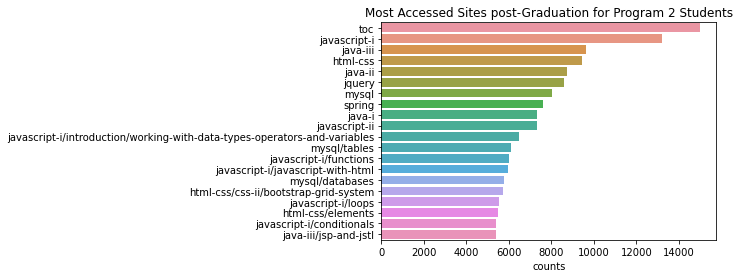

In [377]:
most_accessed_program_2 = sns.barplot(y = program_2_df.index[0:20], x = program_2_df.counts[0:20])
title = most_accessed_program_2.set_title("Most Accessed Sites post-Graduation for Program 2 Students")

### Key Takeaway 

 - The most accessed lesson for post-graduation Program 2 students are:
     - javascript-i, 
     - java-iii, 
     - java-ii, 
     - jquery, 
     - msql,
     - java-i, 
     - javascript-ii
     - working-with-data-types-operators-and-variables,
     - mysql/tables, and 
     - javascript-i/functions.

### Program 3

In [378]:
program_3 = after_graduation[after_graduation.program_id == 3.0]
program_3.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2019-08-20 09:40:28,2019-08-20,09:40:28,3-sql/1-mysql-overview,470,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-08-20 09:40:30,2019-08-20,09:40:30,2-storytelling/bad-charts,467,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-08-20 09:40:50,2019-08-20,09:40:50,appendix/cli-git-overview,479,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-08-20 09:41:02,2019-08-20,09:41:02,1-fundamentals/1.1-intro-to-data-science,469,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-08-20 09:41:28,2019-08-20,09:41:28,1-fundamentals/1.1-intro-to-data-science,480,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0


In [379]:
program_3_df = pd.DataFrame(program_3.path.value_counts())
program_3_df.head()

,path
classification/overview,1518
1-fundamentals/1.1-intro-to-data-science,1506
fundamentals/intro-to-data-science,1229
sql/mysql-overview,1149
6-regression/1-overview,1038


In [380]:
program_3_df = program_3_df.rename(columns = {'path': 'counts'})

In [381]:
program_3_df.head()

,counts
classification/overview,1518
1-fundamentals/1.1-intro-to-data-science,1506
fundamentals/intro-to-data-science,1229
sql/mysql-overview,1149
6-regression/1-overview,1038


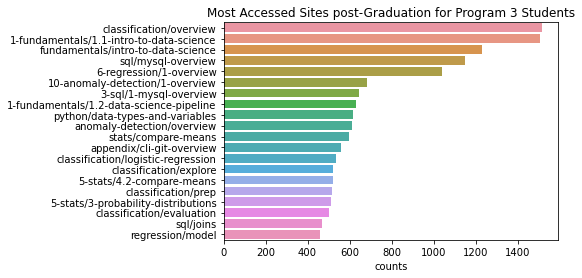

In [382]:
most_accessed_program_3 = sns.barplot(y = program_3_df.index[0:20], x = program_3_df.counts[0:20])
title = most_accessed_program_3.set_title("Most Accessed Sites post-Graduation for Program 3 Students")

### Key Takeaways

 - The most accessed sites for Program 3 students after graduation are (in order of most accessed):
     - classification overview, 
     - fundamentals/intro to data science,
     - mysql overview,
     - regression overview,
     - anomaly detection overview, 
     - data science pipelien, 
     - data types and variables.

## Question 7 

Which lessons are least accessed?

To answer this question, we will have to calculate the number of hits per each page. 

In [29]:
hits_per_page = pd.DataFrame(df.path.value_counts())

In [30]:
hits_per_page.head()

,path
toc,16680
javascript-i,16386
html-css,11843
java-iii,11773
java-ii,10917


Let's look at the pages that accessed the least. That is, the pages that only have one hit. 

In [31]:
hits_per_page[hits_per_page.path == 1].head()

,path
Index.html,1
help,1
1-fundamentals/2.1-intro-to-excel,1
regression/feature_engineering_into_modeling,1
introduction-to-matplotlib,1


In [32]:
len(hits_per_page[hits_per_page.path == 1])

407

There are 407 pages with only one hit. This is too many for us to look at individually. We'll have to find other characteristics by which we can evaluate these pages. This means we will have to attach the value counts to our main DataFrame.

In [19]:
hits_per_page = hits_per_page.reset_index()

In [20]:
hits_per_page = hits_per_page.rename(columns = {'index': 'path', 'path': 'hits'})

In [21]:
hits_per_page.head()

,path,hits
0,toc,16680
1,javascript-i,16386
2,html-css,11843
3,java-iii,11773
4,java-ii,10917


Here we will make a new DataFrame with value counts.

In [22]:
df_with_counts = pd.merge(df, hits_per_page, on = "path", how = "left")

In [23]:
df_with_counts.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,hits
0,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,10917.0
1,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,5672.0
2,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,471.0
3,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,6019.0
4,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,6168.0


In [24]:
 #Create column with date and time of day
df_with_counts['Time'] = pd.to_datetime(df_with_counts['date'] + ' ' + df_with_counts['time'])

df_with_counts = df_with_counts.set_index("Time")


##Set the other columns to datetime
df_with_counts.date = pd.to_datetime(df_with_counts.date)

df_with_counts.time = pd.to_datetime(df_with_counts.time)

In [25]:
df_with_counts.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,hits
Time,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,2021-10-21 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,10917.0
2018-01-26 09:56:05,2018-01-26,2021-10-21 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,5672.0
2018-01-26 09:56:06,2018-01-26,2021-10-21 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,471.0
2018-01-26 09:56:24,2018-01-26,2021-10-21 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,6019.0
2018-01-26 09:56:41,2018-01-26,2021-10-21 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,6168.0


Now let's make a DataFrame of just the pages that were accessed once.

In [26]:
one_hit = df_with_counts[df_with_counts.hits == 1.0]

In [27]:
len(one_hit)

407

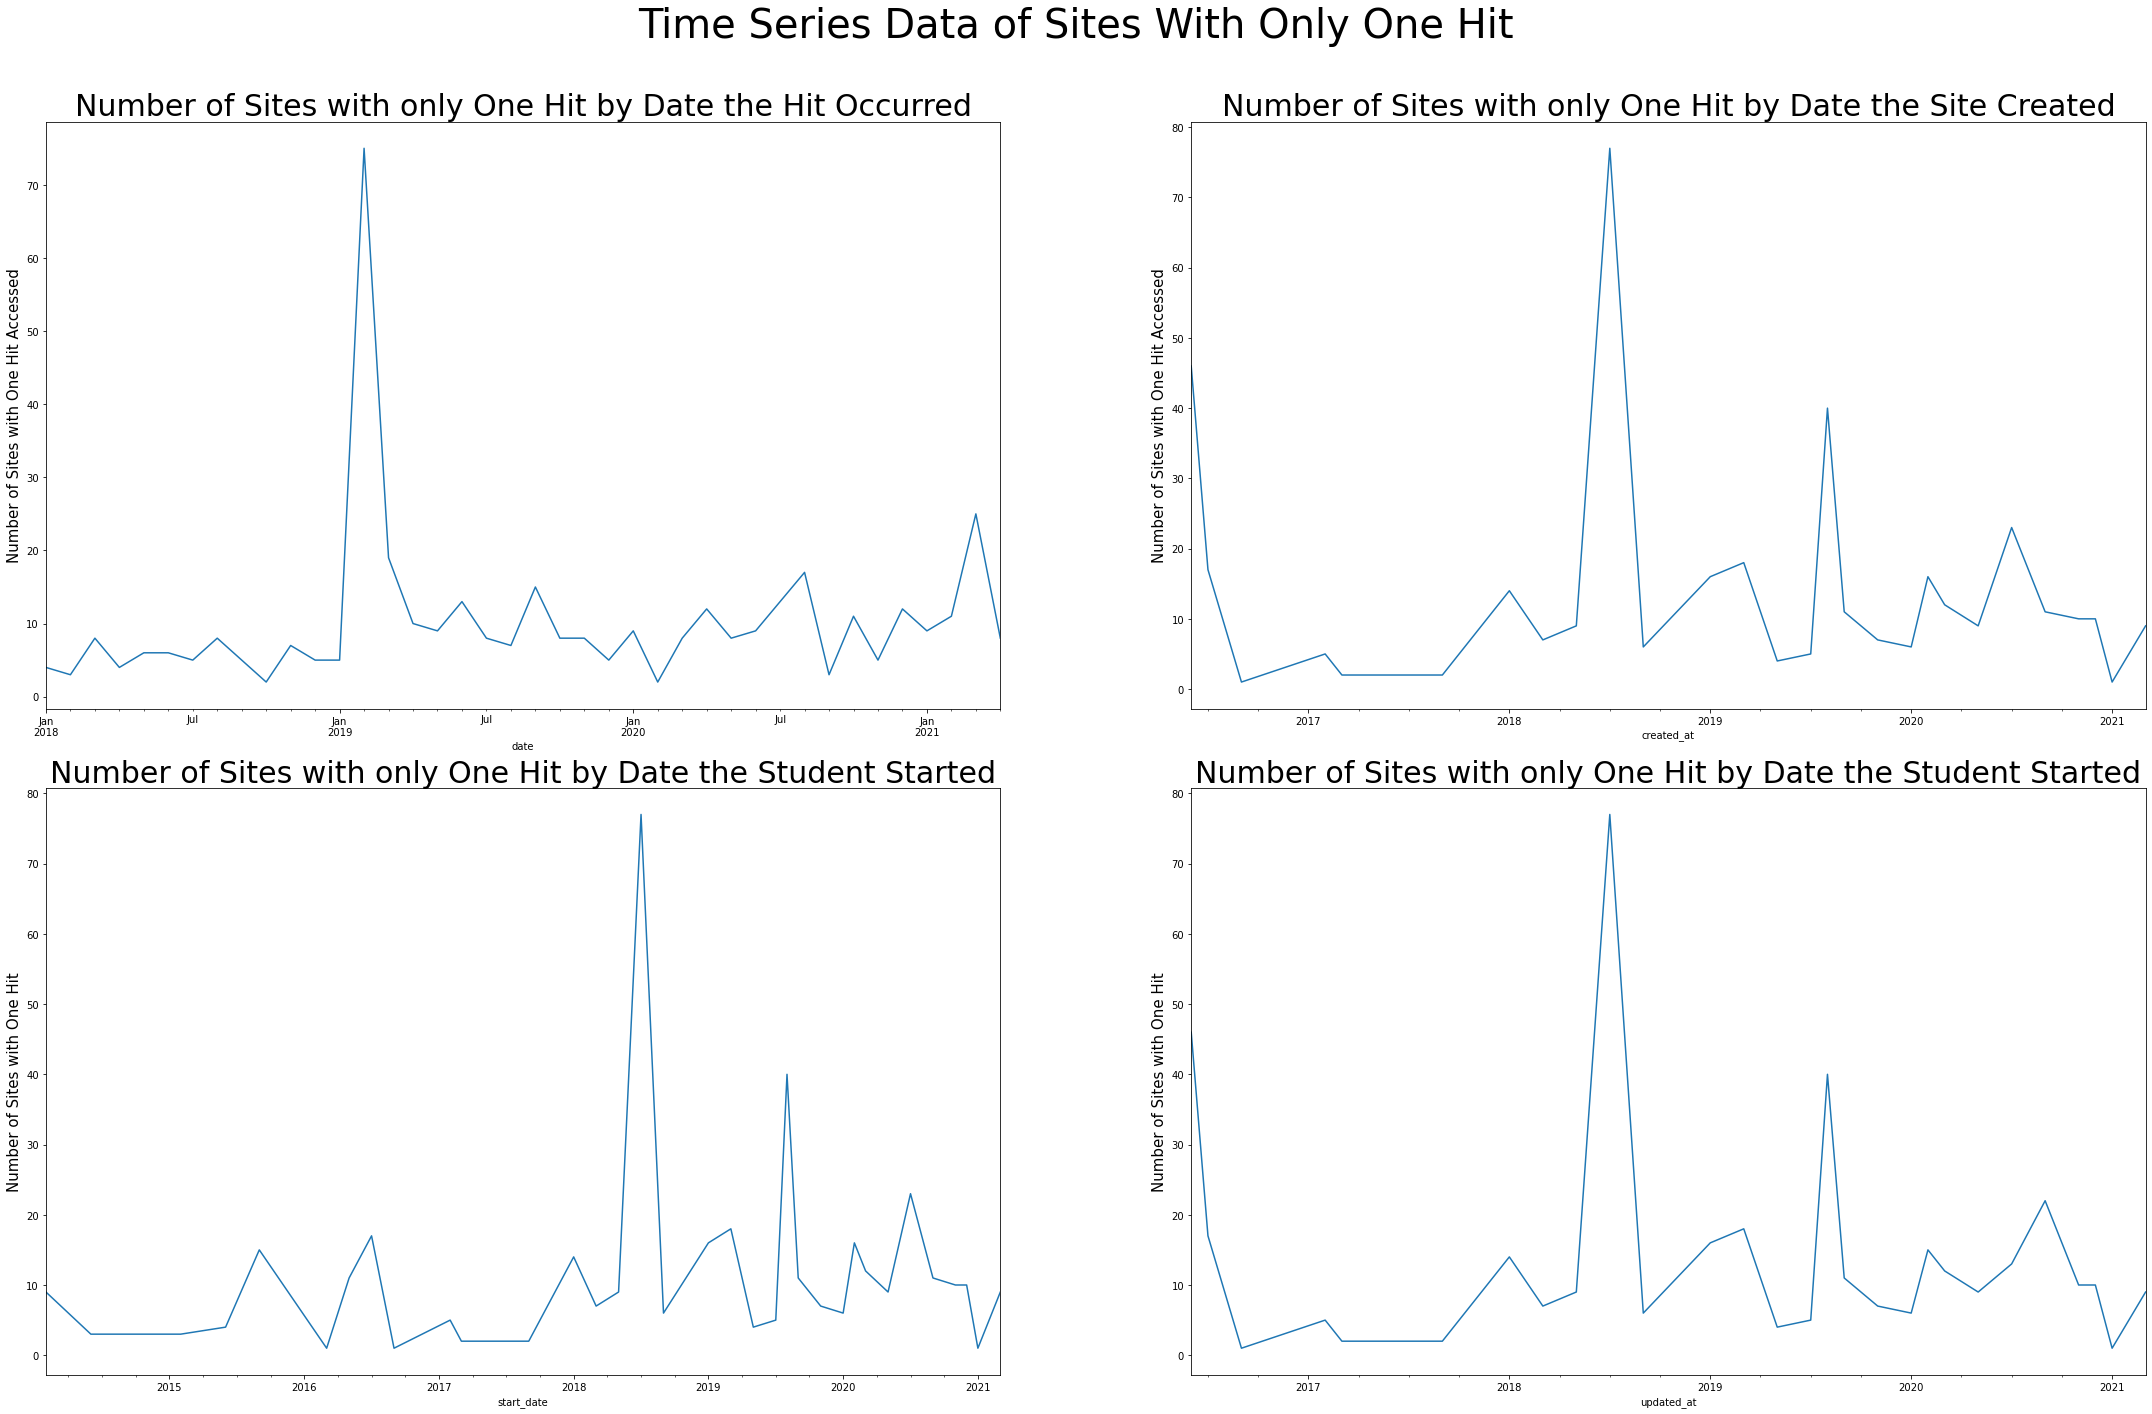

In [50]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (30, 20))

fig.suptitle('Time Series Data of Sites With Only One Hit', fontsize = 40)


one_hit_visualization_1 = one_hit['date'].groupby([one_hit['date'].dt.to_period("M")]).agg('count').plot(ax = axs[0,0])
title = one_hit_visualization_1.set_title("Number of Sites with only One Hit by Date the Hit Occurred", fontsize = 30)
one_hit_visualization_1.set_ylabel("Number of Sites with One Hit Accessed", fontsize = 15)

one_hit_visualization_2 = one_hit['created_at'].groupby([one_hit['created_at'].dt.to_period("M")]).agg('count').plot(ax = axs[0,1])
labels = one_hit_visualization_2.set_title("Number of Sites with only One Hit by Date the Site Created", fontsize = 30)
one_hit_visualization_2.set_ylabel("Number of Sites with One Hit Accessed", fontsize = 15)

one_hit_visualization_3 = one_hit['start_date'].groupby([one_hit['start_date'].dt.to_period("M")]).agg('count').plot(ax = axs[1,0])
labels = one_hit_visualization_3.set_title("Number of Sites with only One Hit by Date the Student Started", fontsize = 30)
one_hit_visualization_3.set_ylabel("Number of Sites with One Hit", fontsize = 15)

one_hit_visualization_4 = one_hit['updated_at'].groupby([one_hit['updated_at'].dt.to_period("M")]).agg('count').plot(ax = axs[1,1])
labels = one_hit_visualization_4.set_title("Number of Sites with only One Hit by Date the Student Started", fontsize = 30)
one_hit_visualization_4.set_ylabel("Number of Sites with One Hit", fontsize = 15)

fig.tight_layout()
fig.subplots_adjust(top=0.9, wspace = 0.2)

There is a peak in "one hit" sites access around winter 2019. 


In [155]:
len(one_hit)

407

In [161]:
surge = one_hit['2018-12-18':'2019-04-01']
surge

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,hits
Time,,,,,,,,,,,,,,,
2018-12-25 20:07:31,2018-12-25,2021-10-21 20:07:31,content/examples/javascript/conditionals.html,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0,1.0
2018-12-25 20:07:49,2018-12-25,2021-10-21 20:07:49,content/examples/javascript/primitive-types.html,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0,1.0
2018-12-27 08:34:31,2018-12-27,2021-10-21 08:34:31,student-page,188,24.0,170.248.173.246,24.0,Voyageurs,#voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0,1.0
2019-01-08 13:32:53,2019-01-08,2021-10-21 13:32:53,quiz115,305,27.0,97.105.19.58,27.0,Yosemite,#yosemite,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,2.0,1.0
2019-01-08 13:32:56,2019-01-08,2021-10-21 13:32:56,quic/115,296,27.0,97.105.19.58,27.0,Yosemite,#yosemite,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-22 11:41:53,2019-03-22,2021-10-21 11:41:53,examples/css/..%5c,373,31.0,97.105.19.58,31.0,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2.0,1.0
2019-03-22 11:42:09,2019-03-22,2021-10-21 11:42:09,examples/css/..%c0%af,373,31.0,97.105.19.58,31.0,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2.0,1.0
2019-03-22 11:42:24,2019-03-22,2021-10-21 11:42:24,examples/css/..%255c,373,31.0,97.105.19.58,31.0,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2.0,1.0


Approximately a quarter of the "one hit" lessons were accessed in winter 2019.

In [162]:
surge.name.value_counts()

Wrangell     67
Yosemite      8
Andromeda     8
Zion          6
Xanadu        5
Voyageurs     2
Lassen        2
Teddy         2
Kings         1
Olympic       1
Name: name, dtype: int64

The majority of these sites were accessed by wrangle students.

In [164]:
surge[surge.name == 'Wrangell']

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,hits
Time,,,,,,,,,,,,,,,
2019-02-13 19:52:40,2019-02-13,2021-10-21 19:52:40,05_creating_files_and_directories,282,25.0,70.122.250.222,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,1.0
2019-02-13 19:55:06,2019-02-13,2021-10-21 19:55:06,02_listing_files,282,25.0,70.122.250.222,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,1.0
2019-02-13 19:55:27,2019-02-13,2021-10-21 19:55:27,03_file_paths,282,25.0,70.122.250.222,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,1.0
2019-02-13 19:55:38,2019-02-13,2021-10-21 19:55:38,04_navigating_the_filesystem,282,25.0,70.122.250.222,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,1.0
2019-02-14 22:47:58,2019-02-14,2021-10-21 22:47:58,2.02.02_Sampling,223,25.0,136.50.20.17,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-14 23:17:51,2019-02-14,2021-10-21 23:17:51,13.01.03_Refine,223,25.0,136.50.20.17,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,1.0
2019-02-14 23:17:56,2019-02-14,2021-10-21 23:17:56,13.01.04_Present,223,25.0,136.50.20.17,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,1.0
2019-02-14 23:18:00,2019-02-14,2021-10-21 23:18:00,13.02_Tableau,223,25.0,136.50.20.17,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,1.0


In [165]:
surge[surge.name == 'Wrangell'].user_id.value_counts()

223    63
282     4
Name: user_id, dtype: int64

### Key Takeaway 

- Many of the paths that only get one hit appear to be from Wrangle cohort students 223 and 282 accessing data in the curriculum between February 13 and February 14 2019.

Lets look at the more recent sites with only one hit.

In [200]:
one_hit.tail(20)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,hits
Time,,,,,,,,,,,,,,,
2021-03-09 11:12:41,2021-03-09,2021-10-21 11:12:41,java-iii/mvc/java-beans/',793,132.0,99.137.94.0,132.0,Kalypso,#kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,2.0,1.0
2021-03-11 09:09:49,2021-03-11,2021-10-21 09:09:49,java-iii/sessions-and-cookies/style/css,790,132.0,99.173.134.103,132.0,Kalypso,#kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,2.0,1.0
2021-03-12 10:00:06,2021-03-12,2021-10-21 10:00:06,code-standards/java,20,22.0,104.190.242.242,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,1.0
2021-03-12 10:00:24,2021-03-12,2021-10-21 10:00:24,further-reading/spring,20,22.0,104.190.242.242,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,1.0
2021-03-12 10:00:27,2021-03-12,2021-10-21 10:00:27,further-reading,20,22.0,104.190.242.242,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,1.0
2021-03-12 10:13:16,2021-03-12,2021-10-21 10:13:16,ds,790,132.0,99.173.134.103,132.0,Kalypso,#kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,2.0,1.0
2021-03-12 15:54:52,2021-03-12,2021-10-21 15:54:52,evaluate,841,133.0,108.84.76.107,133.0,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,1.0
2021-03-17 10:44:31,2021-03-17,2021-10-21 10:44:31,javascript-i/intruduction/operators,923,138.0,173.174.231.66,138.0,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0,1.0
2021-03-23 09:23:19,2021-03-23,2021-10-21 09:23:19,data-science-pipeline,911,137.0,13.58.162.201,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,1.0


In [203]:
one_hit.tail(20).path.to_list()

["java-iii/mvc/java-beans/'",
 'java-iii/sessions-and-cookies/style/css',
 'code-standards/java',
 'further-reading/spring',
 'further-reading',
 'ds',
 'evaluate',
 'javascript-i/intruduction/operators',
 'data-science-pipeline',
 'sql.mysql-overview',
 'sql/database',
 'joins',
 'case-statements',
 'sql',
 'where',
 'extra',
 'job-portal',
 'job-board',
 'selectors',
 'classification/explore-old']

It is unclear if the most recently visited are lessons sites are lessons. Although `joins` and `case_statements` could very well be lessons. 

### Key Takeaways 

There appears to be a series of newly created lessons that very people are accessing. Among these are:
- "java-iii/mvc/java-beans/'",
- 'java-iii/sessions-and-cookies/style/css',
- 'code-standards/java',
- 'further-reading/spring',
- 'further-reading',
- 'ds',
- 'evaluate',
- 'javascript-i/intruduction/operators',
- 'data-science-pipeline',
- 'sql.mysql-overview',
- 'sql/database',
- 'joins',
- 'case-statements',
- 'sql',
- 'where',
- 'extra',
- 'job-portal',
- 'job-board',
- 'selectors',
- 'classification/explore-old'

### Program 1

In [209]:
program_1 = df_with_counts[df_with_counts.program_id == 1.0]

In [210]:
program_1.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,hits
Time,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,2021-10-21 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,10917.0
2018-01-26 09:56:05,2018-01-26,2021-10-21 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,5672.0
2018-01-26 09:56:06,2018-01-26,2021-10-21 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,471.0
2018-01-26 10:14:51,2018-01-26,2021-10-21 10:14:51,javascript-i,11,1.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,16386.0
2018-01-26 10:15:02,2018-01-26,2021-10-21 10:15:02,javascript-i/functions,11,1.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,6799.0


In [211]:
program_1[program_1.hits == program_1.hits.min()]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,hits
Time,,,,,,,,,,,,,,,
2018-01-27 07:49:25,2018-01-27,2021-10-21 07:49:25,teams/13,1,8.0,72.177.226.58,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1.0
2018-01-30 11:41:30,2018-01-30,2021-10-21 11:41:30,asdf,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1.0
2018-02-07 13:48:51,2018-02-07,2021-10-21 13:48:51,home,53,14.0,97.105.19.61,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0,1.0
2018-02-09 20:29:05,2018-02-09,2021-10-21 20:29:05,content/html-css/search_index.json,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0,1.0
2018-03-01 21:07:05,2018-03-01,2021-10-21 21:07:05,prework/cli/07-editing-files-with-vim,114,8.0,173.173.119.75,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11 15:03:49,2021-01-11,2021-10-21 15:03:49,content/examples/examples/examples/gitbook/ima...,88,7.0,136.50.6.131,7.0,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1.0
2021-02-13 05:12:03,2021-02-13,2021-10-21 05:12:03,content/examples/html/forms.html,51,13.0,136.50.79.189,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1.0
2021-02-13 05:12:33,2021-02-13,2021-10-21 05:12:33,content/examples/git/gitbook/images/favicon.ico,51,13.0,136.50.79.189,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1.0


In [212]:
program_1[program_1.hits == program_1.hits.min()].created_at.min()

Timestamp('2016-06-14 19:52:26')

In [213]:
program_1[program_1.hits == program_1.hits.min()].created_at.max()

Timestamp('2017-06-05 20:12:10')

### Key Takeaways

The least popular lessons for Program 1 appear to be old lessons from 2016 and 2017 that students are accessing from 2018 to 2021.

### Program 2

In [215]:
program_2 = df_with_counts[df_with_counts.program_id == 2.0]

In [216]:
program_2.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,hits
Time,,,,,,,,,,,,,,,
2018-01-26 09:56:24,2018-01-26,2021-10-21 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,6019.0
2018-01-26 09:56:41,2018-01-26,2021-10-21 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,6168.0
2018-01-26 09:56:46,2018-01-26,2021-10-21 09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,6019.0
2018-01-26 09:56:48,2018-01-26,2021-10-21 09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,6799.0
2018-01-26 09:56:59,2018-01-26,2021-10-21 09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,6168.0


In [233]:
program_2[program_2.hits == program_2.hits.min()]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,hits
Time,,,,,,,,,,,,,,,
2018-01-26 13:39:02,2018-01-26,2021-10-21 13:39:02,javascript/google-maps-api,38,21.0,97.105.19.61,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,1.0
2018-01-31 15:22:06,2018-01-31,2021-10-21 15:22:06,javascript/loops,47,21.0,97.105.19.61,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,1.0
2018-02-28 16:01:43,2018-02-28,2021-10-21 16:01:43,strings,35,22.0,76.211.179.43,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,1.0
2018-03-12 20:00:03,2018-03-12,2021-10-21 20:00:03,css-ii/grids,126,23.0,67.10.153.249,23.0,Ulysses,#ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2.0,1.0
2018-03-28 15:38:59,2018-03-28,2021-10-21 15:38:59,java-iii/jdbc/poop,20,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 10:44:31,2021-03-17,2021-10-21 10:44:31,javascript-i/intruduction/operators,923,138.0,173.174.231.66,138.0,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0,1.0
2021-04-05 21:49:41,2021-04-05,2021-10-21 21:49:41,extra,939,138.0,76.198.205.9,138.0,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0,1.0
2021-04-06 18:55:50,2021-04-06,2021-10-21 18:55:50,job-portal,764,62.0,72.190.174.52,62.0,Jupiter,#jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2.0,1.0


[Text(0.5, 1.0, 'Sites with one Hits for Program 2')]

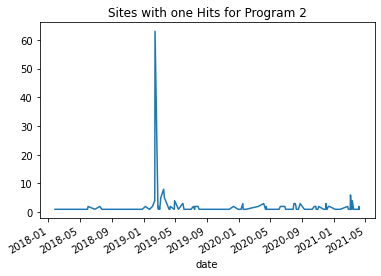

In [234]:
program_2[program_2.hits == program_2.hits.min()].groupby('date').user_id.agg('count').plot().set(Title = "Sites with one Hits for Program 2")

### Key Takeaway

The 2019 surge in rare pathways for Program 2 is likely the surge we saw earlier.

### Program 3

In [235]:
program_3 = df_with_counts[df_with_counts.program_id == 3.0]

In [236]:
program_3[program_3.hits == program_3.hits.min()]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,hits
Time,,,,,,,,,,,,,,,
2019-08-30 12:08:28,2019-08-30,2021-10-21 12:08:28,appendix/cls/2-listing-files,472,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,1.0
2019-08-30 12:08:52,2019-08-30,2021-10-21 12:08:52,appendix/cli/2-Overview,472,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,1.0
2019-08-30 12:08:57,2019-08-30,2021-10-21 12:08:57,appendix/cli/2-overview,472,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,1.0
2019-08-30 14:12:23,2019-08-30,2021-10-21 14:12:23,cli/4-navigating-the-filesystem,468,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,1.0
2019-09-22 22:00:15,2019-09-22,2021-10-21 22:00:15,7-classification/svm,484,34.0,70.117.31.136,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31 09:09:44,2021-03-31,2021-10-21 09:09:44,joins,949,137.0,75.13.87.215,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,1.0
2021-04-05 10:09:01,2021-04-05,2021-10-21 10:09:01,case-statements,949,137.0,136.49.16.164,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,1.0
2021-04-05 14:24:04,2021-04-05,2021-10-21 14:24:04,sql,949,137.0,136.49.16.164,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,1.0


[Text(0.5, 1.0, 'Sites with one Hits for Program 2')]

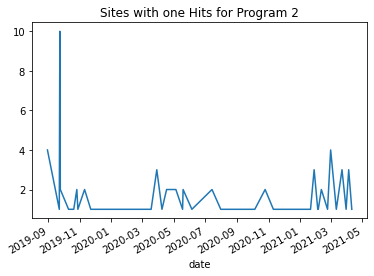

In [237]:
program_3[program_3.hits == program_3.hits.min()].groupby('date').user_id.agg('count').plot().set(Title = "Sites with one Hits for Program 2")

### Key Takeaway 

For program 3, many sites created in late 2019 were only accessed once.

## Question 5

At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

We will calculate the most popular sites for data science students. 

In [260]:
most_popular_db = pd.DataFrame(df[df.program_id ==3.0].path.value_counts().head(100))

In [261]:
most_popular_db.head(10)

,path
classification/overview,1785
1-fundamentals/1.1-intro-to-data-science,1633
sql/mysql-overview,1424
fundamentals/intro-to-data-science,1413
6-regression/1-overview,1124
anomaly-detection/overview,804
10-anomaly-detection/1-overview,751
3-sql/1-mysql-overview,707
stats/compare-means,668
python/data-types-and-variables,667


Now we will calculate the most popular sites for web development students.

In [262]:
most_popular_wd = pd.DataFrame(df[df.program_id ==2.0].path.value_counts().head(100))

In [263]:
most_popular_wd.head()

,path
toc,16517
javascript-i,15640
java-iii,11290
html-css,11285
java-ii,10459


And for program 1. 

In [265]:
most_popular_wd_1= pd.DataFrame(df[df.program_id ==1.0].path.value_counts().head(100))

In [266]:
most_popular_wd_1.head()

,path
index.html,1011
javascript-i,736
html-css,542
spring,501
java-iii,479


Now we'll see where the courses interect.

In [267]:
for col in  most_popular_db.index:
    if len(df[(df.program_id == 2.0)&(df.path == col)]) > 10:
        print("This many web dev students accesed", col, ":", len(df[(df.program_id == 2.0) & (df.path == col)]))
        print(" ")
        

This many web dev students accesed 1-fundamentals/1.1-intro-to-data-science : 30
 
This many web dev students accesed appendix/cli-git-overview : 14
 


In [269]:
for col in  most_popular_db.index:
    if len(df[(df.program_id == 1.0)&(df.path == col)]) > 10:
        print("This many web dev students accesed", col, ":", len(df[(df.program_id == 1.0) & (df.path == col)]))
        print(" ")

This returned an empty list.

In [272]:
for col in  most_popular_wd.index:
    if len(df[(df.program_id == 3.0)&(df.path == col)]) > 10:
        print("This many data students accesed", col, ":", len(df[(df.program_id == 3.0) & (df.path == col)]))
        print(" ")

This many data students accesed toc : 11
 
This many data students accesed html-css : 16
 


In [273]:
for col in  most_popular_wd_1.index:
    if len(df[(df.program_id == 3.0)&(df.path == col)]) > 10:
        print("This many data students accesed", col, ":", len(df[(df.program_id == 3.0) & (df.path == col)]))
        print(" ")

This many data students accesed html-css : 16
 
This many data students accesed toc : 11
 


In [278]:
df[(df.program_id == 2.0)&(df.path.isin(["1-fundamentals/1.1-intro-to-data-science", "appendix/cli-git-overview"] ))]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2019-08-23 11:45:04,2019-08-23,11:45:04,1-fundamentals/1.1-intro-to-data-science,410,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0
2019-08-23 11:46:16,2019-08-23,11:46:16,1-fundamentals/1.1-intro-to-data-science,423,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0
2019-08-23 11:46:27,2019-08-23,11:46:27,appendix/cli-git-overview,410,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0
2019-08-23 11:46:29,2019-08-23,11:46:29,1-fundamentals/1.1-intro-to-data-science,410,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0
2019-08-23 11:46:31,2019-08-23,11:46:31,1-fundamentals/1.1-intro-to-data-science,410,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0
2019-08-26 08:53:28,2019-08-26,08:53:28,1-fundamentals/1.1-intro-to-data-science,41,21.0,97.105.19.58,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0
2019-08-27 08:50:09,2019-08-27,08:50:09,1-fundamentals/1.1-intro-to-data-science,41,21.0,97.105.19.58,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0
2019-08-27 13:22:36,2019-08-27,13:22:36,1-fundamentals/1.1-intro-to-data-science,41,21.0,97.105.19.58,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0
2019-08-27 21:00:16,2019-08-27,21:00:16,1-fundamentals/1.1-intro-to-data-science,18,22.0,45.20.117.182,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


The web dev students visited less data science sites in early September and late October 2019.

In [281]:
df[(df.program_id == 3.0)&(df.path.isin(["toc", "html-css"] ))]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2019-09-23 11:45:02,2019-09-23,11:45:02,toc,476,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-09-25 19:30:42,2019-09-25,19:30:42,html-css,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-09-25 19:30:49,2019-09-25,19:30:49,html-css,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-09-25 19:32:13,2019-09-25,19:32:13,html-css,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-09-27 06:49:19,2019-09-27,06:49:19,toc,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-09-27 06:49:23,2019-09-27,06:49:23,html-css,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-11-15 11:37:51,2019-11-15,11:37:51,toc,467,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-11-15 11:38:01,2019-11-15,11:38:01,toc,467,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
2019-11-25 14:26:13,2019-11-25,14:26:13,html-css,476,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0


[Text(0.5, 1.0, 'Data Students on Web Dev Sites')]

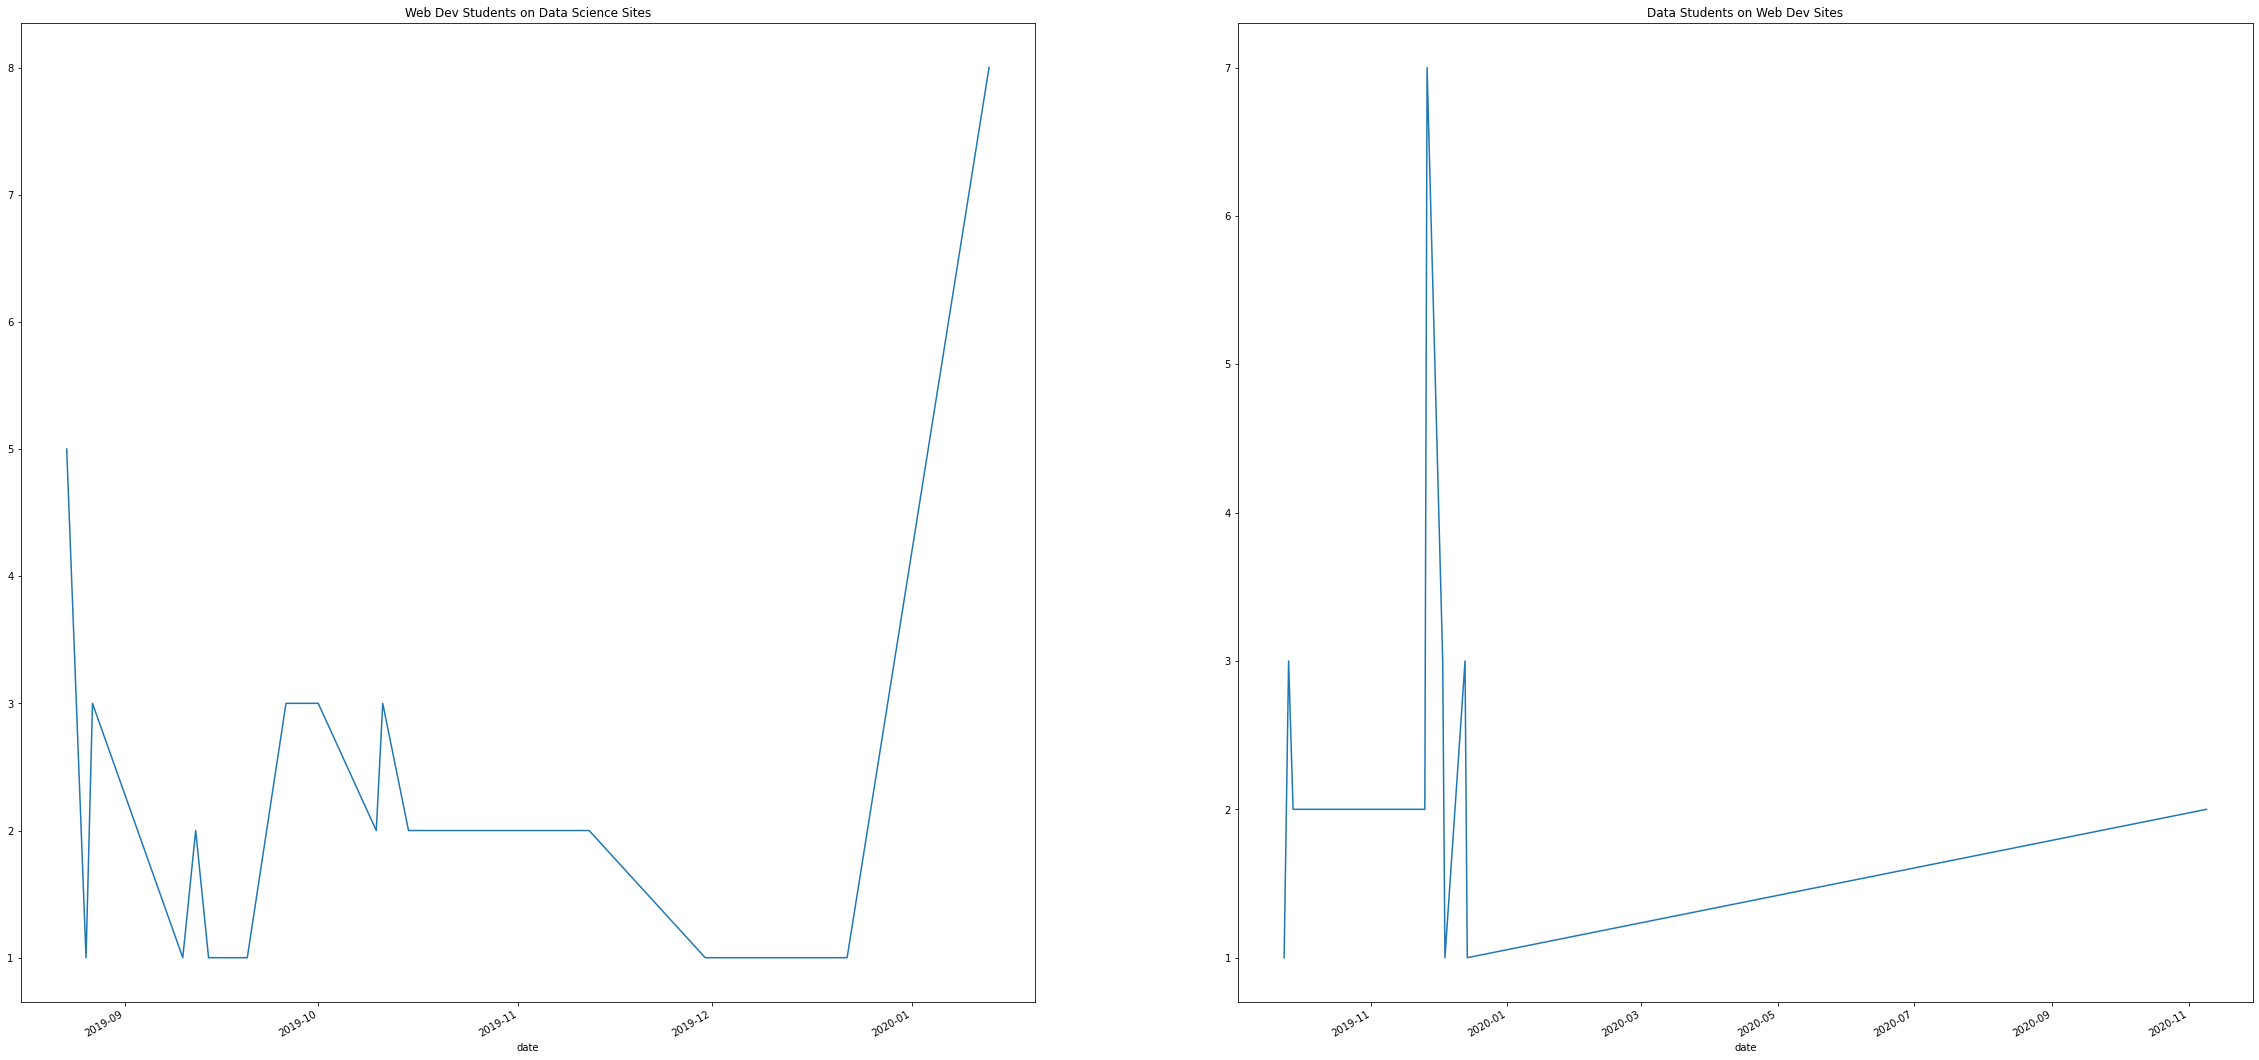

In [287]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (40, 20))

df[(df.program_id == 2.0)&(df.path.isin(["1-fundamentals/1.1-intro-to-data-science", "appendix/cli-git-overview"] ))].groupby('date').user_id.agg('count').plot(ax = ax1).set(Title = "Web Dev Students on Data Science Sites")

df[(df.program_id == 3.0)&(df.path.isin(["toc", "html-css"] ))].groupby('date').user_id.agg('count').plot(ax = ax2).set(Title = "Data Students on Web Dev Sites")



### Key Takeaways

 - The "shut down" likely happend in late October to early November 2019. This is when we see a drop in cross-traffic for both web development and data science students, as indicated in the graphs above. 
 
 - There has not been much crossover before 2019, so there is no evidence that this has happened before. 